# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.stats import skew, kurtosis

import os
#import warnings
#warnings.simplefilter(action = "module", category=FutureWarning)


%matplotlib inline

# Creating DataFrames

## Crypto DataFrame

In [2]:
folder_path = os.path.abspath("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\CryptoData")
files = os.listdir(folder_path)

df_crypto = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\CryptoData\\" + file)
    df_temp["Date"] = pd.to_datetime(df_temp["Date"]).dt.date
    df_temp["PercentChange"] = df_temp["Close"].pct_change() * 100
    df_temp["StockName"] = str(file[:-4])
    df_temp = df_temp[["Date", "PercentChange", "StockName"]]
    df_crypto = pd.concat([df_crypto, df_temp])
df_crypto = pd.pivot_table(data = df_crypto, values = "PercentChange", index = "Date", columns = "StockName")
df_crypto.head()

StockName,Basic Attention Token,Bitcoin Gold,Dash,Decentraland,Decred,Enjin Coin,Gnosis,Holo,KuCoin Token,Loopring,...,coin_ChainLink,coin_Dogecoin,coin_EOS,coin_Ethereum,coin_Iota,coin_Litecoin,coin_Monero,coin_Stellar,coin_Tron,coin_XRP
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.993886,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.532211,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-11.287262,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-9.699642,NaN,NaN,NaN,NaN
2013-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.276614,NaN,NaN,NaN,NaN


## SP500 DataFrame

In [3]:
folder_path = os.path.abspath("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\SP500Data")
files = os.listdir(folder_path)

df_sp500 = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\SP500Data\\" + file)
    df_temp["Date"] = pd.to_datetime(df_temp["Date"]).dt.date
    df_temp["PercentChange"] = df_temp["Close"].pct_change() * 100
    df_temp["StockName"] = str(file[:-4])
    df_temp = df_temp[["Date", "PercentChange", "StockName"]]
    df_sp500 = pd.concat([df_sp500, df_temp])
df_sp500 = pd.pivot_table(data = df_sp500, values = "PercentChange", index = "Date", columns = "StockName")
df_sp500.head()

StockName,AAPL,ABBV,ACN,AMD,AMZN,AVGO,BAC,BRK-B,COST,CSCO,...,PFE,PG,TMO,TSLA,UNH,V,WMT,XOM,^IXIC,^RUT
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.505933,-0.416598,0.520474,-0.722022,-0.502363,-3.345512,0.000000,0.382409,0.244453,-0.454370,...,0.719874,NaN,-0.172977,0.008950,0.188907,0.752972,2.375527,0.852058,-0.237802,0.164163
2016-01-06,-1.956970,0.017434,-0.195386,-8.727273,-0.179873,-3.075924,-2.130250,0.060954,-0.925402,-1.065048,...,-1.771283,NaN,-0.765286,-1.964817,-1.019885,-1.311132,1.001273,-0.832056,-1.138121,-1.447169
2016-01-07,-4.220457,-0.296274,-2.936570,-9.163347,-3.905796,-3.181027,-3.606965,-1.408670,-2.290937,-2.306805,...,-0.664350,NaN,-2.284466,-1.547662,-2.943980,-1.966250,2.328875,-1.600617,-3.025990,-2.723032
2016-01-08,0.528776,-2.726791,-0.968139,-6.140351,-0.146389,-0.658664,-1.935484,-0.888163,-1.750424,-2.479335,...,-1.273887,NaN,-0.111677,-2.156272,-1.721824,-1.233235,-2.291247,-2.020203,-0.976671,-1.725579
2016-01-11,1.619224,-3.180595,1.048886,9.345794,1.760969,-0.124808,0.723684,0.023376,1.715864,1.977397,...,0.225808,NaN,0.536673,-1.492891,-0.526509,1.427005,1.070192,-1.338867,-0.121449,-0.411004


## Commodity DataFrame

In [4]:
folder_path = os.path.abspath("C:\\Users\\Corey Feld\\Documents\\Year2Semester1\\FIN611\\ResearchProject\\CommodityData")
files = os.listdir(folder_path)

df_comm = pd.DataFrame()

for file in files:
    df_temp = pd.read_csv("C:\\Users\Corey Feld\Documents\Year2Semester1\FIN611\ResearchProject\CommodityData\\" + file)
    df_temp["Date"] = pd.to_datetime(df_temp["Date"]).dt.date
    df_temp["PercentChange"] = df_temp["Change %"].str[:-1].astype("float64")
    df_temp.drop(["Change %"], axis = 1, inplace = True)
    df_temp["StockName"] = str(file[:-28])
    df_temp = df_temp[["Date", "PercentChange", "StockName"]]
    df_comm = pd.concat([df_comm, df_temp])

#df_comm.columns = df_comm.columns.str.strip("'")
df_comm = pd.pivot_table(data = df_comm, values = "PercentChange", index = "Date", columns = "StockName")
df_comm.head()

StockName,Brent Oil,Canola,Class III Milk,Cobalt,Copper,Crude Oil WTI,Feeder Cattle,Gasoline RBOB,Gold,Heating Oil,...,Silver,Tin,US Cocoa,US Coffee C,US Corn,US Cotton #2,US Soybeans,US Sugar #11,US Wheat,Zinc
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.16,-0.57,0.00,-1.28,-2.60,-0.31,0.43,-0.04,1.41,2.33,...,0.28,-0.55,-2.59,-2.17,-2.02,-1.15,-0.77,-1.77,-2.50,-2.55
2016-01-05,-2.15,0.51,-0.44,0.00,0.77,-0.92,0.10,-2.63,0.30,-0.10,...,0.94,-1.87,-2.02,-0.71,0.43,0.17,0.38,-2.67,0.65,0.42
2016-01-06,-6.01,0.38,0.15,0.00,-0.36,-2.13,0.32,-7.55,1.25,-3.96,...,0.04,-2.61,-2.52,-2.40,0.07,-0.89,0.92,-1.03,0.33,-2.07
2016-01-07,-1.40,-1.69,0.37,0.00,-3.16,-1.73,-2.67,-1.36,1.46,-1.40,...,2.63,-0.69,-0.60,-1.23,-0.07,-1.25,0.14,2.29,1.24,-3.34
2016-01-08,-0.59,0.70,0.81,0.00,0.00,-0.15,-2.68,-1.60,-0.90,-1.27,...,-2.97,0.15,1.72,0.50,1.13,0.20,0.29,-1.97,2.13,0.94


# GRU Function

In [15]:
def gru(df):
    
    global mse_test_dict
    mse_test_dict = {}
    
    global rmse_test_dict
    rmse_test_dict = {}
    
    global mae_test_dict
    mae_test_dict = {}

    for col in df:

        asset = df[col]
        asset.dropna(inplace = True)
        asset = asset.to_numpy()
        asset = winsorize(asset, limits = [0.1, 0.1])
        asset = pd.Series(asset)
        train_size = int(len(asset) * 0.9)
        train_data = asset.iloc[:train_size]
        test_data = asset.iloc[train_size:]

        scaler = StandardScaler().fit(train_data.values.reshape(-1, 1))
        train_data = scaler.transform(train_data.values.reshape(-1, 1))
        test_data = scaler.transform(test_data.values.reshape(-1, 1))
        
        look_back = 10

        X_train = []
        y_train = []

        for i in range(look_back, len(train_data)):
            X_train.append(train_data[(i - look_back): i, 0])
            y_train.append(train_data[i, 0])

        X_train = np.array(X_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        y_train = np.array(y_train)
        
        model = Sequential()

        model.add(GRU(units = 16, activation = "relu", return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
        model.add(Dropout(0.2))
        model.add(GRU(units = 8, activation = "sigmoid", return_sequences = False))
        model.add(Dropout(0.2))
        model.add(Dense(units = 1))

        model.compile(optimizer = "adam", loss = "mean_squared_error")

        history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.1)
        
        model_inputs = asset[len(asset) - len(test_data) - look_back:].values.reshape(-1, 1)
        model_inputs = scaler.transform(model_inputs)
        
        X_test = []

        for i in range(look_back, len(model_inputs)):
            X_test.append(model_inputs[(i - look_back): i, 0])

        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        print(len(X_test))

        pred_test = model.predict(X_test)
        pred_test = pred_test.flatten().reshape(-1, 1)
        pred_test = scaler.inverse_transform(pred_test)

        plt.plot(history.history["loss"])
        plt.plot(history.history["val_loss"])
        plt.title("Model Train vs Validation Loss")
        plt.ylabel("Loss")
        plt.xlabel("epoch")
        plt.legend(["Train loss", "Validation loss"], loc = "upper right")
        plt.show()
        
        mse_test = mean_squared_error(test_data, pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(test_data, pred_test)
        mse_test_dict[col] = mse_test
        rmse_test_dict[col] = rmse_test
        mae_test_dict[col] = mae_test

    mse_test_dict = dict(sorted(mse_test_dict.items(), key = lambda x:x[0]))
    
    rmse_test_dict = dict(sorted(rmse_test_dict.items(), key = lambda x:x[0]))
    
    mae_test_dict = dict(sorted(mae_test_dict.items(), key = lambda x:x[0]))

# GRU on Crypto DataFrame

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.4195 - val_loss: 1.1095
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2152 - val_loss: 1.0118
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1725 - val_loss: 0.9969
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1831 - val_loss: 0.9976
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1075 - val_loss: 0.9958
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0909 - val_loss: 0.9950
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0716 - val_loss: 0.9947
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1128 - val_loss: 0.9957
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0757 - val_loss: 0.9955
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0668 - val_loss: 0.9974
175
6/6 [=======

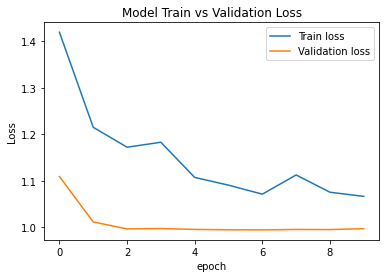

Epoch 1/10
22/22 [==============================] - 4s 27ms/step - loss: 1.1202 - val_loss: 0.7612
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1030 - val_loss: 0.7610
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0849 - val_loss: 0.7608
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0967 - val_loss: 0.7612
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0741 - val_loss: 0.7622
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0727 - val_loss: 0.7609
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0598 - val_loss: 0.7617
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0712 - val_loss: 0.7616
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0360 - val_loss: 0.7617
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0638 - val_loss: 0.7625
175
6/6 [======

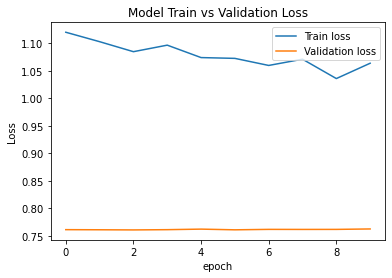

Epoch 1/10
22/22 [==============================] - 5s 51ms/step - loss: 1.4155 - val_loss: 1.2656
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2224 - val_loss: 1.1299
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1187 - val_loss: 1.0688
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0639 - val_loss: 1.0502
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0488 - val_loss: 1.0497
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0392 - val_loss: 1.0495
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0444 - val_loss: 1.0497
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0614 - val_loss: 1.0496
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0222 - val_loss: 1.0496
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0210 - val_loss: 1.0497
175
6/6 [========

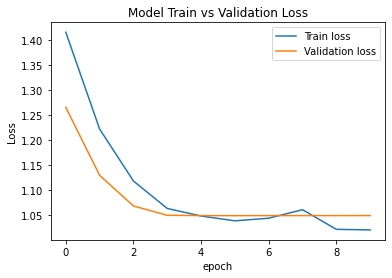

Epoch 1/10
22/22 [==============================] - 4s 30ms/step - loss: 1.2183 - val_loss: 1.1135
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1056 - val_loss: 1.0990
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1379 - val_loss: 1.0984
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0833 - val_loss: 1.0977
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0910 - val_loss: 1.0975
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0898 - val_loss: 1.0967
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0831 - val_loss: 1.0967
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0683 - val_loss: 1.0959
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0774 - val_loss: 1.0950
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0453 - val_loss: 1.0943
175
6/6 [=======

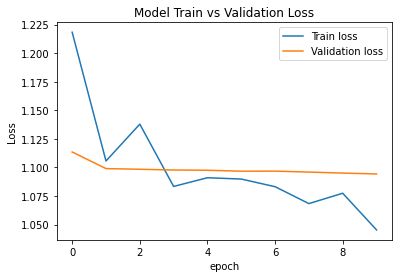

Epoch 1/10
22/22 [==============================] - 5s 40ms/step - loss: 3.6520 - val_loss: 3.4761
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 2.9124 - val_loss: 2.7974
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 2.2483 - val_loss: 2.1302
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.5900 - val_loss: 1.3387
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0737 - val_loss: 1.0344
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0198 - val_loss: 1.0333
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0063 - val_loss: 1.0345
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0200 - val_loss: 1.0370
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0226 - val_loss: 1.0384
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0110 - val_loss: 1.0391
175
6/6 [========

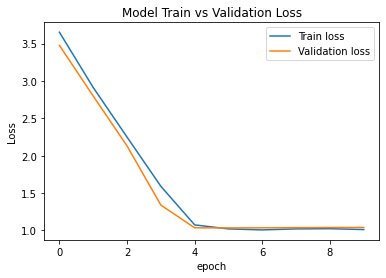

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 1.1653 - val_loss: 1.0992
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1124 - val_loss: 1.0923
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1105 - val_loss: 1.0912
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1165 - val_loss: 1.0922
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0663 - val_loss: 1.0932
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0626 - val_loss: 1.0920
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0844 - val_loss: 1.0933
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0688 - val_loss: 1.0962
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0342 - val_loss: 1.0971
Epoch 10/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0141 - val_loss: 1.0979
175
6/6 [===

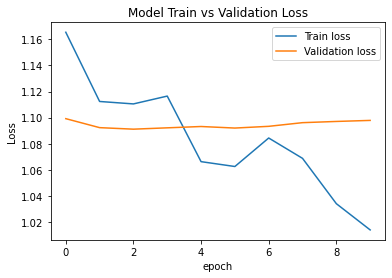

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.1147 - val_loss: 0.9245
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0749 - val_loss: 0.9172
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0957 - val_loss: 0.9164
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0822 - val_loss: 0.9176
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0935 - val_loss: 0.9161
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0392 - val_loss: 0.9155
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0570 - val_loss: 0.9146
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0731 - val_loss: 0.9156
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0490 - val_loss: 0.9133
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0356 - val_loss: 0.9142
175
6/6 [=========

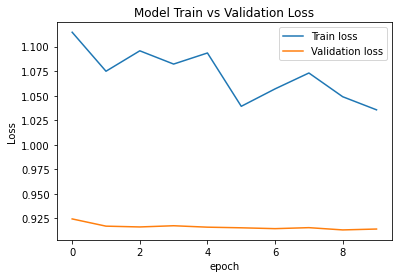

Epoch 1/10
22/22 [==============================] - 5s 37ms/step - loss: 1.3969 - val_loss: 0.9642
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2095 - val_loss: 0.8281
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1275 - val_loss: 0.7507
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0708 - val_loss: 0.7174
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0889 - val_loss: 0.7107
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0675 - val_loss: 0.7042
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0519 - val_loss: 0.7042
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0621 - val_loss: 0.7054
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0537 - val_loss: 0.7035
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0417 - val_loss: 0.7052
168
6/6 [=========

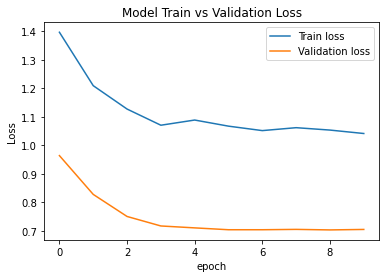

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 1.0373 - val_loss: 0.9952
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0669 - val_loss: 0.9986
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0448 - val_loss: 0.9980
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0468 - val_loss: 0.9943
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0286 - val_loss: 0.9982
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0332 - val_loss: 0.9955
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0136 - val_loss: 0.9960
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0285 - val_loss: 0.9994
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0325 - val_loss: 0.9942
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0053 - val_loss: 0.9949
175
6/6 [=========

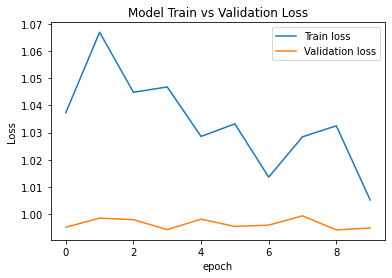

Epoch 1/10
22/22 [==============================] - 5s 40ms/step - loss: 1.0878 - val_loss: 1.1648
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0090 - val_loss: 1.1386
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0402 - val_loss: 1.1358
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0295 - val_loss: 1.1380
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0126 - val_loss: 1.1360
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0121 - val_loss: 1.1355
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0185 - val_loss: 1.1374
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9929 - val_loss: 1.1373
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0043 - val_loss: 1.1342
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0009 - val_loss: 1.1341
175
6/6 [=========

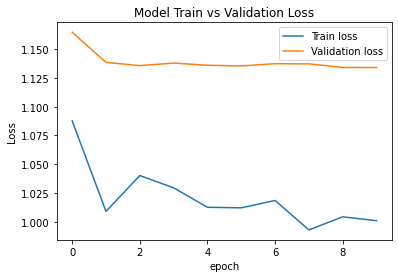

Epoch 1/10
22/22 [==============================] - 5s 33ms/step - loss: 1.1234 - val_loss: 0.8187
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0947 - val_loss: 0.8182
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1095 - val_loss: 0.8173
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1084 - val_loss: 0.8178
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1018 - val_loss: 0.8170
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0729 - val_loss: 0.8168
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0603 - val_loss: 0.8168
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0633 - val_loss: 0.8168
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0538 - val_loss: 0.8173
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0398 - val_loss: 0.8176
175
6/6 [=======

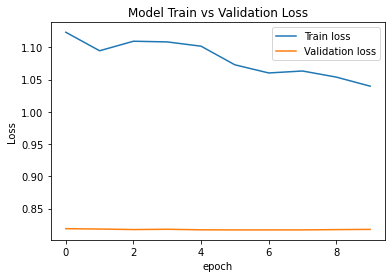

Epoch 1/10
22/22 [==============================] - 5s 38ms/step - loss: 2.0315 - val_loss: 1.5820
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.6237 - val_loss: 1.2543
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.3750 - val_loss: 1.0318
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2218 - val_loss: 0.9088
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1528 - val_loss: 0.8632
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1146 - val_loss: 0.8511
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1372 - val_loss: 0.8536
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1312 - val_loss: 0.8532
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1027 - val_loss: 0.8518
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1416 - val_loss: 0.8537
175
6/6 [=========

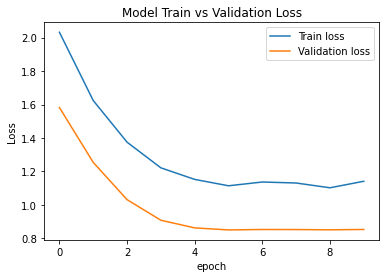

Epoch 1/10
22/22 [==============================] - 5s 47ms/step - loss: 1.1575 - val_loss: 0.9929
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0753 - val_loss: 0.9873
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1174 - val_loss: 0.9849
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1103 - val_loss: 0.9852
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0807 - val_loss: 0.9855
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0866 - val_loss: 0.9861
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0594 - val_loss: 0.9852
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0264 - val_loss: 0.9854
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0273 - val_loss: 0.9886
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0163 - val_loss: 0.9884
175
6/6 [=========

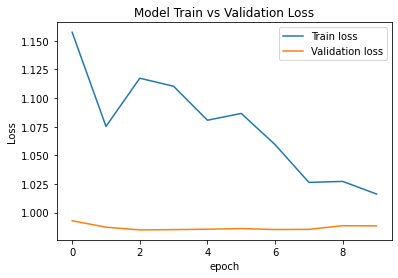

Epoch 1/10
22/22 [==============================] - 5s 33ms/step - loss: 1.1131 - val_loss: 0.9866
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1167 - val_loss: 0.9958
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0811 - val_loss: 0.9998
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0904 - val_loss: 1.0008
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0596 - val_loss: 0.9954
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0574 - val_loss: 1.0048
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0446 - val_loss: 0.9963
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0211 - val_loss: 0.9989
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0125 - val_loss: 0.9971
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0076 - val_loss: 1.0011
175
6/6 [=========

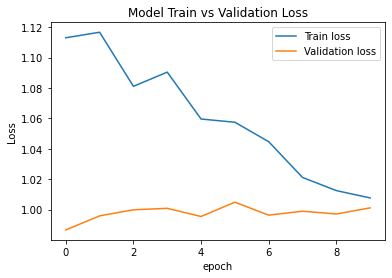

Epoch 1/10
22/22 [==============================] - 4s 33ms/step - loss: 1.4410 - val_loss: 1.0500
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2114 - val_loss: 0.9630
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1028 - val_loss: 0.9428
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0668 - val_loss: 0.9507
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0697 - val_loss: 0.9608
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0731 - val_loss: 0.9626
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0420 - val_loss: 0.9645
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0755 - val_loss: 0.9556
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0464 - val_loss: 0.9563
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0507 - val_loss: 0.9616
168
6/6 [=========

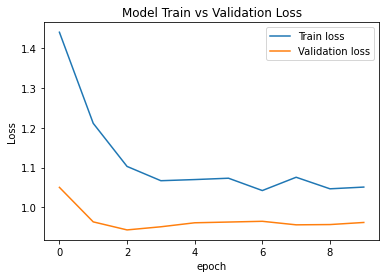

Epoch 1/10
22/22 [==============================] - 5s 37ms/step - loss: 1.7292 - val_loss: 1.1798
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.4181 - val_loss: 1.0059
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2400 - val_loss: 0.9508
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1259 - val_loss: 0.9571
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1445 - val_loss: 0.9653
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0856 - val_loss: 0.9611
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1257 - val_loss: 0.9661
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0685 - val_loss: 0.9660
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0775 - val_loss: 0.9640
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0212 - val_loss: 0.9634
175
6/6 [=========

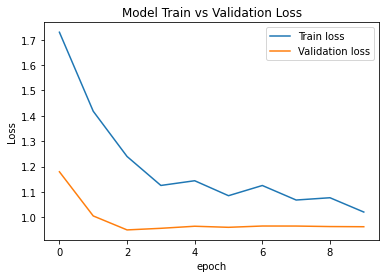

Epoch 1/10
22/22 [==============================] - 5s 39ms/step - loss: 1.1533 - val_loss: 1.0205
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0744 - val_loss: 0.9966
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0607 - val_loss: 0.9949
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0632 - val_loss: 0.9952
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0219 - val_loss: 0.9956
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0717 - val_loss: 0.9955
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0177 - val_loss: 0.9955
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0382 - val_loss: 0.9954
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0090 - val_loss: 0.9893
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 0.9993 - val_loss: 0.9865
175
6/6 [=========

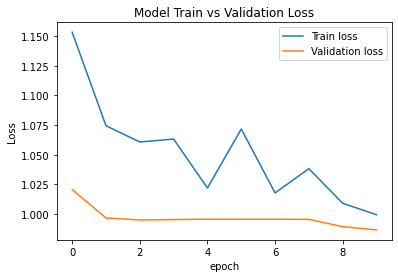

Epoch 1/10
21/21 [==============================] - 5s 42ms/step - loss: 1.2908 - val_loss: 0.9542
Epoch 2/10
21/21 [==============================] - 0s 9ms/step - loss: 1.1595 - val_loss: 0.8567
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 1.1213 - val_loss: 0.8110
Epoch 4/10
21/21 [==============================] - 0s 10ms/step - loss: 1.0979 - val_loss: 0.8023
Epoch 5/10
21/21 [==============================] - 0s 10ms/step - loss: 1.0696 - val_loss: 0.7986
Epoch 6/10
21/21 [==============================] - 0s 7ms/step - loss: 1.0840 - val_loss: 0.8053
Epoch 7/10
21/21 [==============================] - 0s 8ms/step - loss: 1.0774 - val_loss: 0.8010
Epoch 8/10
21/21 [==============================] - 0s 8ms/step - loss: 1.0624 - val_loss: 0.7993
Epoch 9/10
21/21 [==============================] - 0s 8ms/step - loss: 1.0693 - val_loss: 0.7974
Epoch 10/10
21/21 [==============================] - 0s 7ms/step - loss: 1.0364 - val_loss: 0.7991
167
6/6 [======

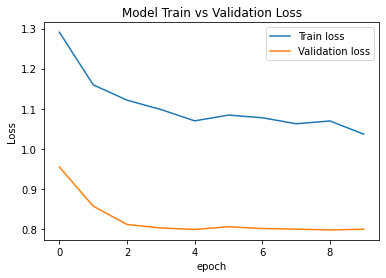

Epoch 1/10
19/19 [==============================] - 5s 44ms/step - loss: 1.0841 - val_loss: 0.8228
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1094 - val_loss: 0.8236
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1037 - val_loss: 0.8278
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0787 - val_loss: 0.8310
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 1.1167 - val_loss: 0.8221
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0960 - val_loss: 0.8210
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0878 - val_loss: 0.8228
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0836 - val_loss: 0.8245
Epoch 9/10
19/19 [==============================] - 0s 8ms/step - loss: 1.0667 - val_loss: 0.8228
Epoch 10/10
19/19 [==============================] - 0s 10ms/step - loss: 1.0580 - val_loss: 0.8266
145
5/5 [======

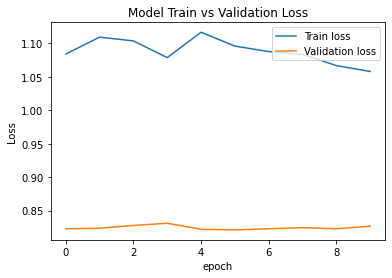

Epoch 1/10
38/38 [==============================] - 5s 23ms/step - loss: 1.1023 - val_loss: 0.8907
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0719 - val_loss: 0.8909
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0939 - val_loss: 0.8915
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0579 - val_loss: 0.8914
Epoch 5/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0606 - val_loss: 0.8924
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0398 - val_loss: 0.8931
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0257 - val_loss: 0.8943
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0164 - val_loss: 0.8945
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0127 - val_loss: 0.8947
Epoch 10/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0072 - val_loss: 0.8942
299
10/10 [=======

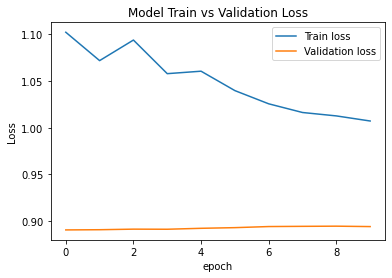

Epoch 1/10
18/18 [==============================] - 6s 47ms/step - loss: 1.8843 - val_loss: 1.4803
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 1.5903 - val_loss: 1.3141
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 1.3961 - val_loss: 1.2109
Epoch 4/10
18/18 [==============================] - 0s 10ms/step - loss: 1.1944 - val_loss: 1.1607
Epoch 5/10
18/18 [==============================] - 0s 11ms/step - loss: 1.0801 - val_loss: 1.2079
Epoch 6/10
18/18 [==============================] - 0s 11ms/step - loss: 1.0413 - val_loss: 1.2499
Epoch 7/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0262 - val_loss: 1.2087
Epoch 8/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0198 - val_loss: 1.2172
Epoch 9/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0399 - val_loss: 1.2171
Epoch 10/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0078 - val_loss: 1.2087
138
5/5 [=====

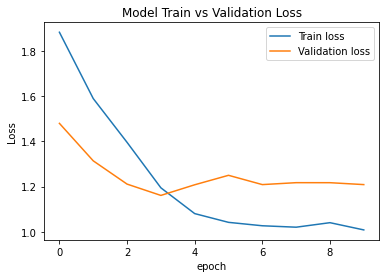

Epoch 1/10
18/18 [==============================] - 5s 42ms/step - loss: 1.1016 - val_loss: 1.1027
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0903 - val_loss: 1.0630
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 1.0806 - val_loss: 1.0520
Epoch 4/10
18/18 [==============================] - 0s 10ms/step - loss: 1.0872 - val_loss: 1.0499
Epoch 5/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0654 - val_loss: 1.0497
Epoch 6/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0594 - val_loss: 1.0491
Epoch 7/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0418 - val_loss: 1.0514
Epoch 8/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0575 - val_loss: 1.0510
Epoch 9/10
18/18 [==============================] - 0s 8ms/step - loss: 1.0444 - val_loss: 1.0499
Epoch 10/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0126 - val_loss: 1.0486
139
5/5 [=======

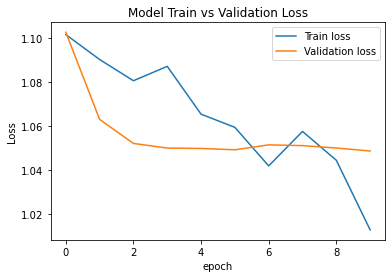

Epoch 1/10
35/35 [==============================] - 6s 39ms/step - loss: 1.2875 - val_loss: 0.6667
Epoch 2/10
35/35 [==============================] - 0s 9ms/step - loss: 1.1866 - val_loss: 0.6585
Epoch 3/10
35/35 [==============================] - 0s 9ms/step - loss: 1.1992 - val_loss: 0.6591
Epoch 4/10
35/35 [==============================] - 0s 10ms/step - loss: 1.1595 - val_loss: 0.6590
Epoch 5/10
35/35 [==============================] - 0s 9ms/step - loss: 1.1105 - val_loss: 0.6593
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 1.1124 - val_loss: 0.6611
Epoch 7/10
35/35 [==============================] - 0s 9ms/step - loss: 1.0783 - val_loss: 0.6657
Epoch 8/10
35/35 [==============================] - 0s 9ms/step - loss: 1.0597 - val_loss: 0.6603
Epoch 9/10
35/35 [==============================] - 0s 9ms/step - loss: 1.0523 - val_loss: 0.6610
Epoch 10/10
35/35 [==============================] - 0s 9ms/step - loss: 1.0480 - val_loss: 0.6601
276
9/9 [========

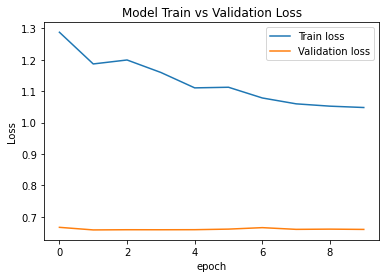

Epoch 1/10
19/19 [==============================] - 5s 39ms/step - loss: 1.2005 - val_loss: 0.7848
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 1.2111 - val_loss: 0.7845
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1862 - val_loss: 0.7881
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1568 - val_loss: 0.7911
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1494 - val_loss: 0.7883
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 1.1383 - val_loss: 0.7875
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 1.1332 - val_loss: 0.7956
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0924 - val_loss: 0.7899
Epoch 9/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0823 - val_loss: 0.7891
Epoch 10/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0757 - val_loss: 0.7872
147
5/5 [======

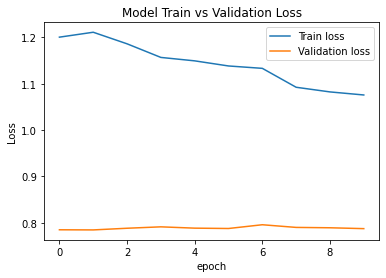

Epoch 1/10
28/28 [==============================] - 5s 29ms/step - loss: 1.1213 - val_loss: 0.7687
Epoch 2/10
28/28 [==============================] - 0s 9ms/step - loss: 1.0818 - val_loss: 0.7653
Epoch 3/10
28/28 [==============================] - 0s 9ms/step - loss: 1.0625 - val_loss: 0.7697
Epoch 4/10
28/28 [==============================] - 0s 10ms/step - loss: 1.1010 - val_loss: 0.7703
Epoch 5/10
28/28 [==============================] - 0s 9ms/step - loss: 1.0652 - val_loss: 0.7699
Epoch 6/10
28/28 [==============================] - 0s 10ms/step - loss: 1.0400 - val_loss: 0.7670
Epoch 7/10
28/28 [==============================] - 0s 10ms/step - loss: 1.0336 - val_loss: 0.7684
Epoch 8/10
28/28 [==============================] - 0s 10ms/step - loss: 1.0202 - val_loss: 0.7713
Epoch 9/10
28/28 [==============================] - 0s 9ms/step - loss: 1.0312 - val_loss: 0.7680
Epoch 10/10
28/28 [==============================] - 0s 10ms/step - loss: 1.0268 - val_loss: 0.7700
216
7/7 [====

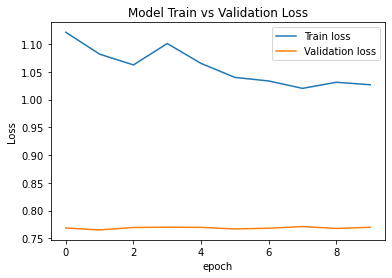

Epoch 1/10
19/19 [==============================] - 5s 44ms/step - loss: 1.2644 - val_loss: 1.0466
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1545 - val_loss: 0.9579
Epoch 3/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1390 - val_loss: 0.9354
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 1.1205 - val_loss: 0.9340
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1063 - val_loss: 0.9354
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 1.1046 - val_loss: 0.9349
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 1.1215 - val_loss: 0.9358
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0914 - val_loss: 0.9320
Epoch 9/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0774 - val_loss: 0.9339
Epoch 10/10
19/19 [==============================] - 0s 9ms/step - loss: 1.0721 - val_loss: 0.9294
149
5/5 [====

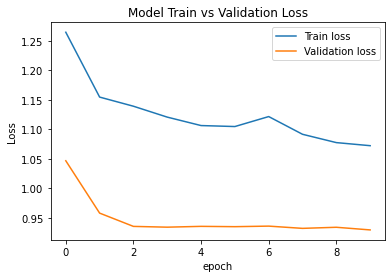

Epoch 1/10
38/38 [==============================] - 5s 23ms/step - loss: 1.1451 - val_loss: 0.9796
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 1.1272 - val_loss: 0.9735
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0996 - val_loss: 0.9733
Epoch 4/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0769 - val_loss: 0.9721
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0577 - val_loss: 0.9726
Epoch 6/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0435 - val_loss: 0.9713
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 1.0278 - val_loss: 0.9651
Epoch 8/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0135 - val_loss: 0.9686
Epoch 9/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0052 - val_loss: 0.9670
Epoch 10/10
38/38 [==============================] - 0s 8ms/step - loss: 1.0059 - val_loss: 0.9667
299
10/10 [=======

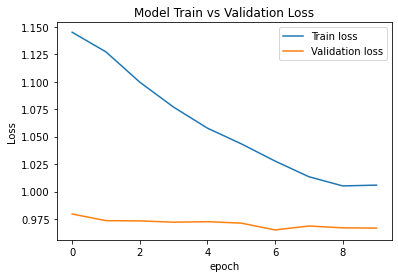

Epoch 1/10
33/33 [==============================] - 5s 28ms/step - loss: 1.1686 - val_loss: 0.6966
Epoch 2/10
33/33 [==============================] - 0s 9ms/step - loss: 1.1642 - val_loss: 0.6982
Epoch 3/10
33/33 [==============================] - 0s 9ms/step - loss: 1.1462 - val_loss: 0.6970
Epoch 4/10
33/33 [==============================] - 0s 8ms/step - loss: 1.1478 - val_loss: 0.6974
Epoch 5/10
33/33 [==============================] - 0s 8ms/step - loss: 1.1321 - val_loss: 0.6973
Epoch 6/10
33/33 [==============================] - 0s 8ms/step - loss: 1.1326 - val_loss: 0.6973
Epoch 7/10
33/33 [==============================] - 0s 9ms/step - loss: 1.0866 - val_loss: 0.6988
Epoch 8/10
33/33 [==============================] - 0s 10ms/step - loss: 1.0617 - val_loss: 0.6994
Epoch 9/10
33/33 [==============================] - 0s 9ms/step - loss: 1.0639 - val_loss: 0.6931
Epoch 10/10
33/33 [==============================] - 0s 9ms/step - loss: 1.0530 - val_loss: 0.6945
261
9/9 [========

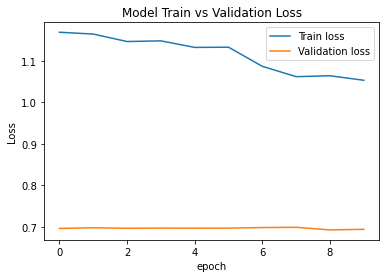

Epoch 1/10
32/32 [==============================] - 5s 31ms/step - loss: 1.3193 - val_loss: 0.8112
Epoch 2/10
32/32 [==============================] - 0s 10ms/step - loss: 1.1326 - val_loss: 0.7491
Epoch 3/10
32/32 [==============================] - 0s 10ms/step - loss: 1.0704 - val_loss: 0.7493
Epoch 4/10
32/32 [==============================] - 0s 9ms/step - loss: 1.0815 - val_loss: 0.7508
Epoch 5/10
32/32 [==============================] - 0s 10ms/step - loss: 1.0679 - val_loss: 0.7490
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 1.0605 - val_loss: 0.7529
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 1.0563 - val_loss: 0.7494
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0336 - val_loss: 0.7510
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0314 - val_loss: 0.7542
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0288 - val_loss: 0.7503
253
8/8 [======

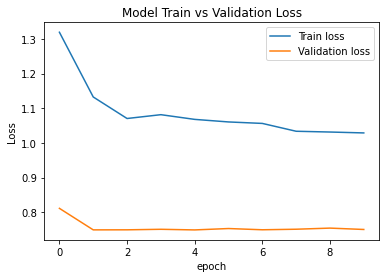

Epoch 1/10
18/18 [==============================] - 5s 44ms/step - loss: 1.2321 - val_loss: 0.8880
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 1.1325 - val_loss: 0.8310
Epoch 3/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0886 - val_loss: 0.8100
Epoch 4/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0674 - val_loss: 0.8085
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 1.0593 - val_loss: 0.8120
Epoch 6/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0634 - val_loss: 0.8128
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 1.0612 - val_loss: 0.8124
Epoch 8/10
18/18 [==============================] - 0s 9ms/step - loss: 1.0384 - val_loss: 0.8119
Epoch 9/10
18/18 [==============================] - 0s 10ms/step - loss: 1.0376 - val_loss: 0.8120
Epoch 10/10
18/18 [==============================] - 0s 10ms/step - loss: 1.0768 - val_loss: 0.8108
140
5/5 [======

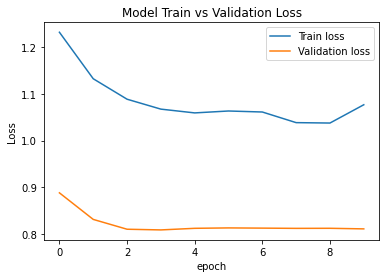

Epoch 1/10
37/37 [==============================] - 5s 22ms/step - loss: 1.2557 - val_loss: 0.7352
Epoch 2/10
37/37 [==============================] - 0s 9ms/step - loss: 1.1651 - val_loss: 0.7414
Epoch 3/10
37/37 [==============================] - 0s 8ms/step - loss: 1.1710 - val_loss: 0.7382
Epoch 4/10
37/37 [==============================] - 0s 9ms/step - loss: 1.1353 - val_loss: 0.7371
Epoch 5/10
37/37 [==============================] - 0s 9ms/step - loss: 1.0993 - val_loss: 0.7370
Epoch 6/10
37/37 [==============================] - 0s 9ms/step - loss: 1.0655 - val_loss: 0.7466
Epoch 7/10
37/37 [==============================] - 0s 7ms/step - loss: 1.0321 - val_loss: 0.7312
Epoch 8/10
37/37 [==============================] - 0s 7ms/step - loss: 1.0285 - val_loss: 0.7380
Epoch 9/10
37/37 [==============================] - 0s 7ms/step - loss: 1.0272 - val_loss: 0.7387
Epoch 10/10
37/37 [==============================] - 0s 8ms/step - loss: 1.0266 - val_loss: 0.7341
290
10/10 [=======

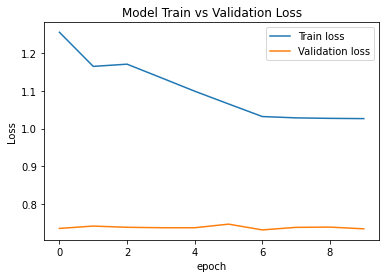

{'Basic Attention Token': 0.9800796590124131, 'Bitcoin Gold': 0.9549537415456553, 'Dash': 1.1010648497724003, 'Decentraland': 0.902716095387666, 'Decred': 0.9846133105766739, 'Enjin Coin': 1.0285419791251382, 'Gnosis': 0.9454483428653004, 'Holo': 0.7544293287893892, 'KuCoin Token': 0.6746845149665279, 'Loopring': 0.923895068625638, 'NEM': 0.975362186178914, 'Neo': 0.9864545926030187, 'Qtum': 0.995044929854278, 'Tezos': 0.9471925552824635, 'Theta Network': 1.1445766063528264, 'Waves': 1.4005353095487012, 'Zcash': 1.0991796008869863, 'Zilliqa': 1.0184362877954278, 'coin_BinanceCoin': 1.6885877249686825, 'coin_Bitcoin': 1.2567761139087792, 'coin_Cardano': 1.3006108755396022, 'coin_ChainLink': 1.4487541901718275, 'coin_Dogecoin': 1.4509826448659688, 'coin_EOS': 1.5218248433408061, 'coin_Ethereum': 1.3417258470006717, 'coin_Iota': 1.5337640870431373, 'coin_Litecoin': 1.4005142823958716, 'coin_Monero': 0.9975514344272866, 'coin_Stellar': 1.2656030941387004, 'coin_Tron': 1.255625780764113, 'c

In [16]:
gru(df_crypto)

gru_crypto_mse_dict = mse_test_dict
gru_crypto_rmse_dict = rmse_test_dict
gru_crypto_mae_dict = mae_test_dict
print(gru_crypto_mse_dict)
print(gru_crypto_rmse_dict)
print(gru_crypto_mae_dict)

# GRU on SP500 DataFrame

Epoch 1/10
22/22 [==============================] - 6s 59ms/step - loss: 1.0534 - val_loss: 1.0041
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0253 - val_loss: 1.0029
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0546 - val_loss: 1.0028
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0317 - val_loss: 1.0032
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0159 - val_loss: 1.0031
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0245 - val_loss: 1.0033
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0237 - val_loss: 1.0029
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0149 - val_loss: 1.0037
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0088 - val_loss: 1.0043
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0035 - val_loss: 1.0038
171
6/6 [======

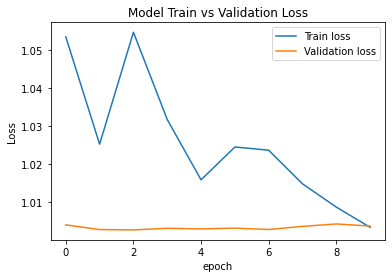

Epoch 1/10
22/22 [==============================] - 5s 33ms/step - loss: 1.1405 - val_loss: 0.7771
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1145 - val_loss: 0.7444
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1237 - val_loss: 0.7347
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0782 - val_loss: 0.7335
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0776 - val_loss: 0.7334
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0527 - val_loss: 0.7326
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0611 - val_loss: 0.7292
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0456 - val_loss: 0.7292
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0425 - val_loss: 0.7384
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0296 - val_loss: 0.7332
171
6/6 [=======

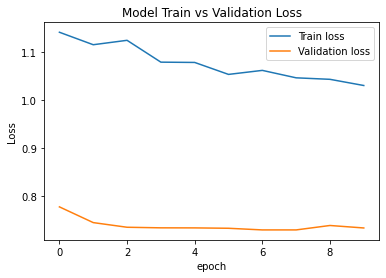

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 1.1579 - val_loss: 1.1652
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0443 - val_loss: 1.1430
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0381 - val_loss: 1.1430
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0780 - val_loss: 1.1437
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0245 - val_loss: 1.1447
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0198 - val_loss: 1.1468
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0656 - val_loss: 1.1478
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0191 - val_loss: 1.1525
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 0.9907 - val_loss: 1.1612
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9888 - val_loss: 1.1622
171
6/6 [========

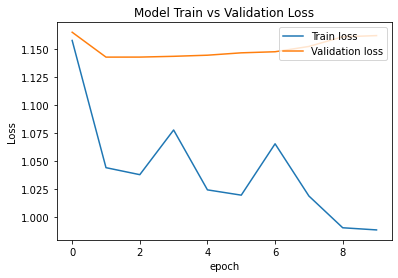

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.4369 - val_loss: 1.1428
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2232 - val_loss: 1.0210
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1343 - val_loss: 0.9801
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1012 - val_loss: 0.9751
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0996 - val_loss: 0.9760
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0661 - val_loss: 0.9777
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0467 - val_loss: 0.9786
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0380 - val_loss: 0.9805
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0337 - val_loss: 0.9872
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0074 - val_loss: 0.9914
171
6/6 [=========

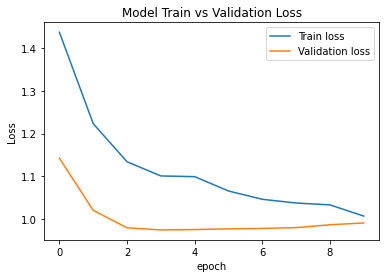

Epoch 1/10
22/22 [==============================] - 5s 38ms/step - loss: 1.1402 - val_loss: 1.0209
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1124 - val_loss: 1.0232
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1245 - val_loss: 1.0237
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0647 - val_loss: 1.0170
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0586 - val_loss: 1.0191
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0879 - val_loss: 1.0140
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0684 - val_loss: 1.0123
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0397 - val_loss: 1.0138
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9988 - val_loss: 1.0207
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0087 - val_loss: 1.0170
171
6/6 [=========

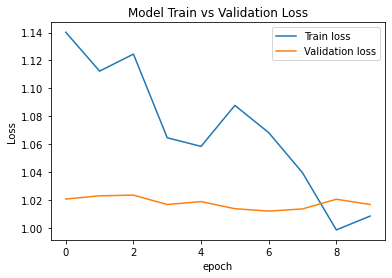

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.1664 - val_loss: 0.8692
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1299 - val_loss: 0.8403
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0910 - val_loss: 0.8366
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0820 - val_loss: 0.8362
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0861 - val_loss: 0.8364
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0694 - val_loss: 0.8347
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0547 - val_loss: 0.8342
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0951 - val_loss: 0.8344
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0489 - val_loss: 0.8331
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0402 - val_loss: 0.8332
171
6/6 [=========

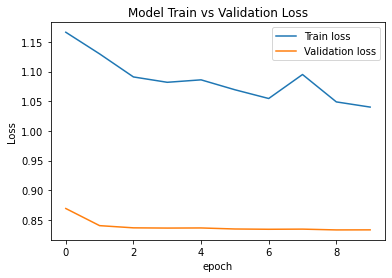

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.2521 - val_loss: 1.0855
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1426 - val_loss: 1.0675
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1615 - val_loss: 1.0660
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1486 - val_loss: 1.0653
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1073 - val_loss: 1.0641
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1160 - val_loss: 1.0634
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1076 - val_loss: 1.0629
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0801 - val_loss: 1.0629
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0467 - val_loss: 1.0616
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0552 - val_loss: 1.0617
171
6/6 [=========

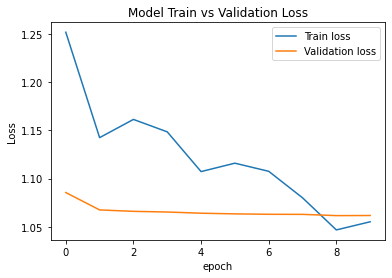

Epoch 1/10
22/22 [==============================] - 5s 36ms/step - loss: 1.2910 - val_loss: 1.1082
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1226 - val_loss: 1.0270
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1037 - val_loss: 1.0096
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0431 - val_loss: 1.0096
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0693 - val_loss: 1.0081
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0474 - val_loss: 1.0058
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0508 - val_loss: 1.0055
Epoch 8/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0456 - val_loss: 1.0006
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0163 - val_loss: 0.9980
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0089 - val_loss: 0.9971
171
6/6 [=========

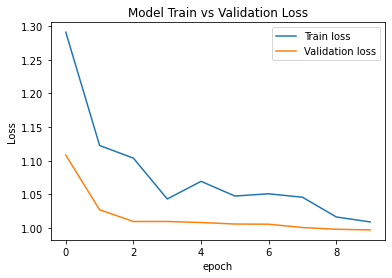

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 1.8338 - val_loss: 1.7547
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.4255 - val_loss: 1.4438
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2256 - val_loss: 1.2140
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1063 - val_loss: 1.1197
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0820 - val_loss: 1.1315
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0701 - val_loss: 1.1236
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0806 - val_loss: 1.1242
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0550 - val_loss: 1.1268
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0424 - val_loss: 1.1199
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0130 - val_loss: 1.1213
171
6/6 [========

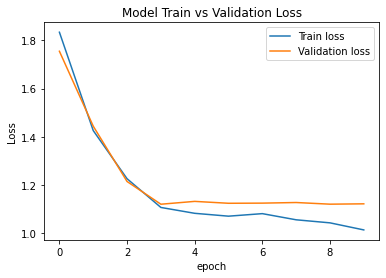

Epoch 1/10
22/22 [==============================] - 5s 36ms/step - loss: 1.1876 - val_loss: 0.9684
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1179 - val_loss: 0.9688
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1121 - val_loss: 0.9684
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0809 - val_loss: 0.9676
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1124 - val_loss: 0.9699
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0635 - val_loss: 0.9722
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0308 - val_loss: 0.9650
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0223 - val_loss: 0.9668
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0071 - val_loss: 0.9695
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0103 - val_loss: 0.9699
171
6/6 [======

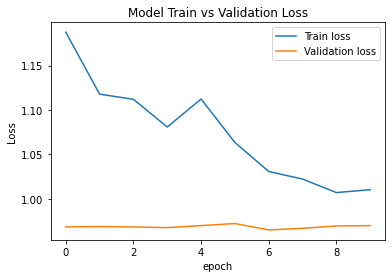

Epoch 1/10
22/22 [==============================] - 5s 33ms/step - loss: 1.9079 - val_loss: 1.8446
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.5455 - val_loss: 1.5159
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.3015 - val_loss: 1.2536
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1121 - val_loss: 1.0911
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0419 - val_loss: 1.0800
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0334 - val_loss: 1.0833
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0149 - val_loss: 1.0863
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0112 - val_loss: 1.0946
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9932 - val_loss: 1.1011
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9845 - val_loss: 1.0979
171
6/6 [=========

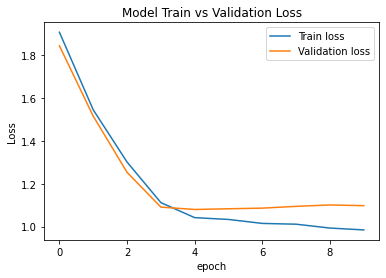

Epoch 1/10
22/22 [==============================] - 6s 33ms/step - loss: 1.8372 - val_loss: 1.5935
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.5050 - val_loss: 1.3806
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2866 - val_loss: 1.2457
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1510 - val_loss: 1.1708
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0508 - val_loss: 1.1480
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0195 - val_loss: 1.1611
Epoch 7/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0174 - val_loss: 1.1657
Epoch 8/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0083 - val_loss: 1.1691
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 0.9936 - val_loss: 1.1674
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 0.9942 - val_loss: 1.1681
171
6/6 [=========

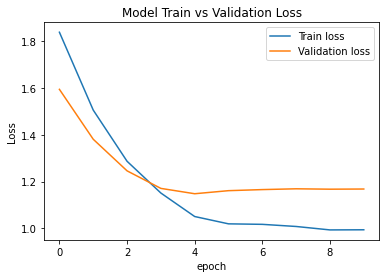

Epoch 1/10
22/22 [==============================] - 5s 59ms/step - loss: 2.1798 - val_loss: 1.9156
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.7574 - val_loss: 1.5494
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.4235 - val_loss: 1.2613
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1716 - val_loss: 1.0458
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0764 - val_loss: 1.0072
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0760 - val_loss: 1.0128
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0438 - val_loss: 1.0082
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0384 - val_loss: 1.0126
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0493 - val_loss: 1.0090
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0177 - val_loss: 1.0096
171
6/6 [========

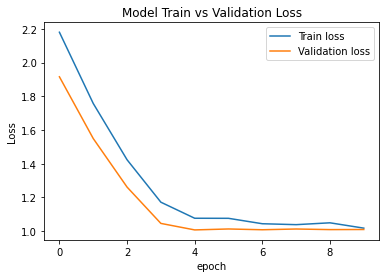

Epoch 1/10
22/22 [==============================] - 5s 40ms/step - loss: 1.2147 - val_loss: 1.1554
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0987 - val_loss: 1.0668
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0343 - val_loss: 1.0351
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0308 - val_loss: 1.0249
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0470 - val_loss: 1.0234
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0177 - val_loss: 1.0237
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0297 - val_loss: 1.0226
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0273 - val_loss: 1.0225
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0097 - val_loss: 1.0250
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0241 - val_loss: 1.0217
171
6/6 [========

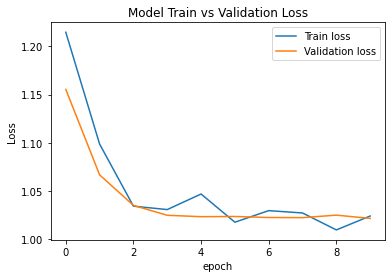

Epoch 1/10
22/22 [==============================] - 5s 39ms/step - loss: 2.5011 - val_loss: 2.2909
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 2.0226 - val_loss: 1.8889
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.6560 - val_loss: 1.5956
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.4351 - val_loss: 1.3823
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2424 - val_loss: 1.2319
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1170 - val_loss: 1.1430
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0766 - val_loss: 1.1121
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0543 - val_loss: 1.1067
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0361 - val_loss: 1.1027
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0169 - val_loss: 1.0983
171
6/6 [========

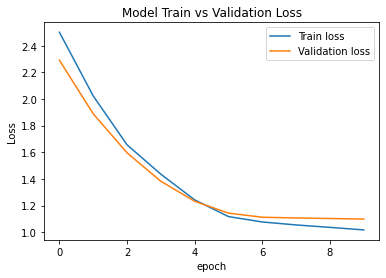

Epoch 1/10
22/22 [==============================] - 6s 45ms/step - loss: 1.0844 - val_loss: 0.9424
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0576 - val_loss: 0.9416
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0759 - val_loss: 0.9422
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0464 - val_loss: 0.9424
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0831 - val_loss: 0.9426
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0427 - val_loss: 0.9440
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0300 - val_loss: 0.9428
Epoch 8/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0549 - val_loss: 0.9456
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0457 - val_loss: 0.9461
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0194 - val_loss: 0.9458
171
6/6 [=========

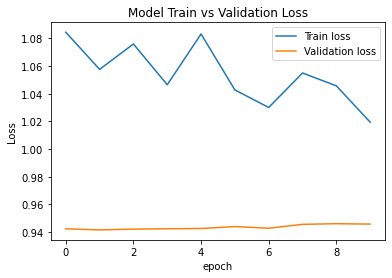

Epoch 1/10
22/22 [==============================] - 5s 31ms/step - loss: 2.7731 - val_loss: 2.2784
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 2.2091 - val_loss: 1.8159
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.8013 - val_loss: 1.4785
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.4831 - val_loss: 1.2360
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2951 - val_loss: 1.1006
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1611 - val_loss: 1.0906
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1313 - val_loss: 1.0853
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1030 - val_loss: 1.0784
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1320 - val_loss: 1.0791
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0918 - val_loss: 1.0714
171
6/6 [=========

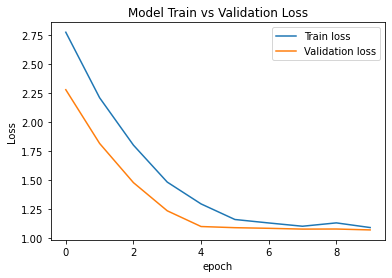

Epoch 1/10
22/22 [==============================] - 6s 34ms/step - loss: 1.5119 - val_loss: 1.0582
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2708 - val_loss: 0.9129
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1779 - val_loss: 0.8600
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1510 - val_loss: 0.8456
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1817 - val_loss: 0.8443
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1301 - val_loss: 0.8431
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1014 - val_loss: 0.8435
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0768 - val_loss: 0.8437
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0457 - val_loss: 0.8480
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0335 - val_loss: 0.8450
171
6/6 [========

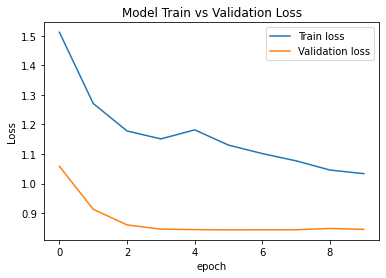

Epoch 1/10
22/22 [==============================] - 5s 36ms/step - loss: 1.7445 - val_loss: 1.6120
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.4276 - val_loss: 1.3341
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2434 - val_loss: 1.1311
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1007 - val_loss: 1.0442
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0725 - val_loss: 1.0445
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0336 - val_loss: 1.0492
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0461 - val_loss: 1.0525
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0258 - val_loss: 1.0566
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0205 - val_loss: 1.0607
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0064 - val_loss: 1.0636
171
6/6 [======

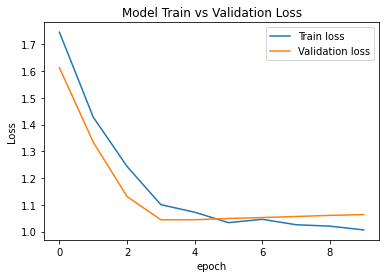

Epoch 1/10
22/22 [==============================] - 5s 36ms/step - loss: 1.3608 - val_loss: 1.3457
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2474 - val_loss: 1.3053
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1570 - val_loss: 1.3078
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1521 - val_loss: 1.3061
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1445 - val_loss: 1.3074
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1238 - val_loss: 1.3082
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0917 - val_loss: 1.3071
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0487 - val_loss: 1.3058
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0533 - val_loss: 1.3042
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0200 - val_loss: 1.3010
171
6/6 [=========

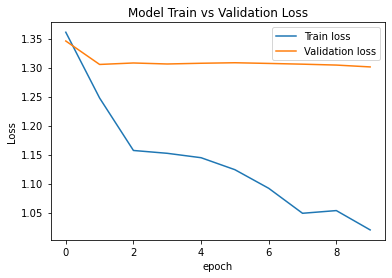

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.3031 - val_loss: 1.1039
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2011 - val_loss: 1.0103
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1069 - val_loss: 0.9845
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1094 - val_loss: 0.9806
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1080 - val_loss: 0.9807
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0501 - val_loss: 0.9814
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0575 - val_loss: 0.9819
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0644 - val_loss: 0.9805
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0569 - val_loss: 0.9799
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0244 - val_loss: 0.9770
171
6/6 [=======

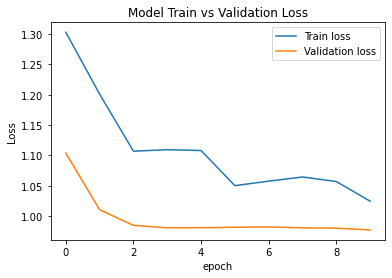

Epoch 1/10
22/22 [==============================] - 5s 51ms/step - loss: 1.0299 - val_loss: 1.1439
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0144 - val_loss: 1.1461
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0116 - val_loss: 1.1470
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0096 - val_loss: 1.1458
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0149 - val_loss: 1.1420
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9897 - val_loss: 1.1430
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0102 - val_loss: 1.1436
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0022 - val_loss: 1.1420
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9932 - val_loss: 1.1419
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9946 - val_loss: 1.1423
171
6/6 [=========

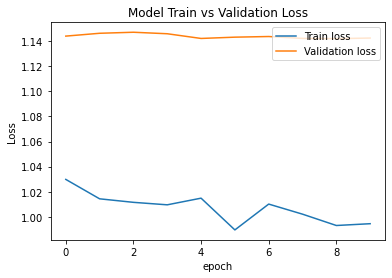

Epoch 1/10
22/22 [==============================] - 5s 31ms/step - loss: 1.0674 - val_loss: 0.9998
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0618 - val_loss: 0.9998
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0675 - val_loss: 1.0006
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0415 - val_loss: 1.0018
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0512 - val_loss: 1.0027
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0547 - val_loss: 1.0040
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0372 - val_loss: 1.0055
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0086 - val_loss: 1.0067
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0050 - val_loss: 1.0040
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0098 - val_loss: 1.0025
171
6/6 [========

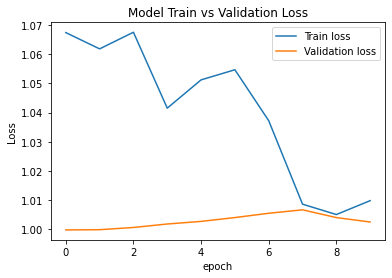

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 3.0576 - val_loss: 2.5336
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 2.4356 - val_loss: 2.0439
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.9800 - val_loss: 1.6558
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.6587 - val_loss: 1.3061
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.2711 - val_loss: 1.0069
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1077 - val_loss: 0.9658
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0585 - val_loss: 0.9558
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0257 - val_loss: 0.9568
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0170 - val_loss: 0.9582
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0097 - val_loss: 0.9580
171
6/6 [=========

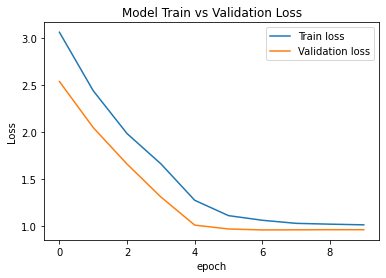

Epoch 1/10
22/22 [==============================] - 5s 31ms/step - loss: 2.1737 - val_loss: 1.8386
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.7177 - val_loss: 1.5373
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.3860 - val_loss: 1.3301
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1810 - val_loss: 1.2165
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0275 - val_loss: 1.2450
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0395 - val_loss: 1.2293
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0264 - val_loss: 1.2318
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0214 - val_loss: 1.2232
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0275 - val_loss: 1.2225
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0248 - val_loss: 1.2250
171
6/6 [========

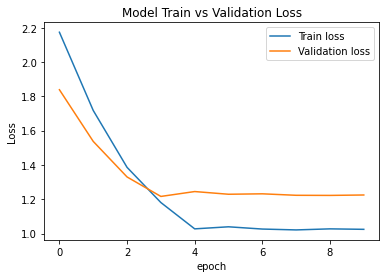

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.9632 - val_loss: 1.6037
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.6087 - val_loss: 1.2852
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.3560 - val_loss: 1.0640
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1974 - val_loss: 0.9013
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1029 - val_loss: 0.8347
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0810 - val_loss: 0.8337
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1027 - val_loss: 0.8308
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0939 - val_loss: 0.8380
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0746 - val_loss: 0.8318
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0661 - val_loss: 0.8299
171
6/6 [=========

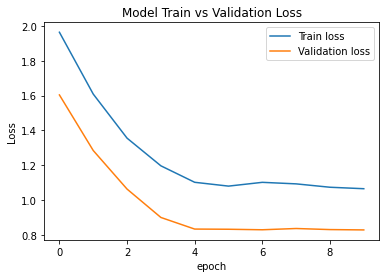

Epoch 1/10
22/22 [==============================] - 5s 33ms/step - loss: 1.1559 - val_loss: 1.4466
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0621 - val_loss: 1.4300
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0261 - val_loss: 1.4334
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0482 - val_loss: 1.4339
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0381 - val_loss: 1.4335
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0557 - val_loss: 1.4315
Epoch 7/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0514 - val_loss: 1.4318
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9932 - val_loss: 1.4354
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0137 - val_loss: 1.4274
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9740 - val_loss: 1.4272
171
6/6 [=========

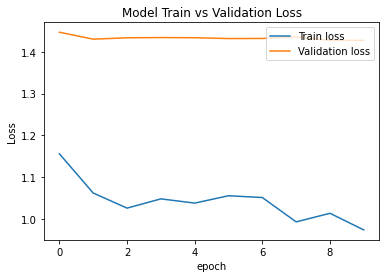

Epoch 1/10
6/6 [==============================] - 5s 119ms/step - loss: 1.1353 - val_loss: 1.4737
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 1.2359 - val_loss: 1.4589
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 1.0542 - val_loss: 1.4525
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 1.1323 - val_loss: 1.4512
Epoch 5/10
6/6 [==============================] - 0s 13ms/step - loss: 1.0310 - val_loss: 1.4517
Epoch 6/10
6/6 [==============================] - 0s 15ms/step - loss: 1.1403 - val_loss: 1.4528
Epoch 7/10
6/6 [==============================] - 0s 15ms/step - loss: 1.0494 - val_loss: 1.4537
Epoch 8/10
6/6 [==============================] - 0s 14ms/step - loss: 1.1376 - val_loss: 1.4547
Epoch 9/10
6/6 [==============================] - 0s 18ms/step - loss: 1.1005 - val_loss: 1.4548
Epoch 10/10
6/6 [==============================] - 0s 15ms/step - loss: 1.0640 - val_loss: 1.4547
45
2/2 [====================

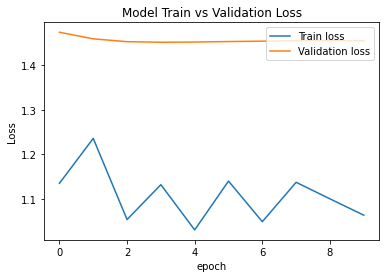

Epoch 1/10
22/22 [==============================] - 5s 33ms/step - loss: 1.1643 - val_loss: 0.9248
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0963 - val_loss: 0.9157
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0947 - val_loss: 0.9154
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1011 - val_loss: 0.9154
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1047 - val_loss: 0.9154
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0620 - val_loss: 0.9155
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0447 - val_loss: 0.9155
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0065 - val_loss: 0.9136
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0255 - val_loss: 0.9145
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0162 - val_loss: 0.9149
171
6/6 [=========

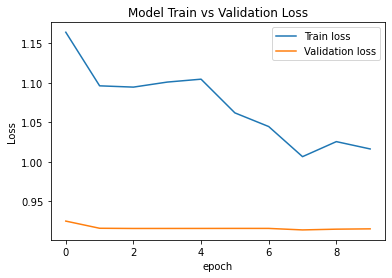

Epoch 1/10
22/22 [==============================] - 5s 54ms/step - loss: 1.1001 - val_loss: 0.9991
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1062 - val_loss: 0.9990
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0994 - val_loss: 0.9981
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0938 - val_loss: 0.9983
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0709 - val_loss: 0.9990
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0758 - val_loss: 0.9983
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0570 - val_loss: 0.9987
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0415 - val_loss: 0.9987
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0539 - val_loss: 0.9993
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0218 - val_loss: 0.9990
171
6/6 [=========

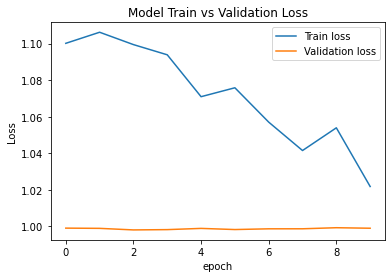

Epoch 1/10
22/22 [==============================] - 5s 36ms/step - loss: 1.1599 - val_loss: 0.9785
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1428 - val_loss: 0.9799
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0756 - val_loss: 0.9814
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1221 - val_loss: 0.9805
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1081 - val_loss: 0.9813
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0832 - val_loss: 0.9844
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0218 - val_loss: 0.9809
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0274 - val_loss: 0.9786
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0108 - val_loss: 0.9789
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9994 - val_loss: 0.9800
171
6/6 [=========

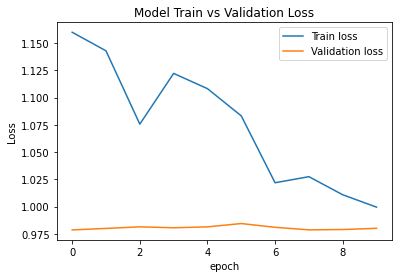

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.7481 - val_loss: 1.4530
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.3961 - val_loss: 1.2567
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1905 - val_loss: 1.1806
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0908 - val_loss: 1.2002
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0669 - val_loss: 1.1983
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0759 - val_loss: 1.1846
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0527 - val_loss: 1.1932
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0379 - val_loss: 1.1955
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0510 - val_loss: 1.1974
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0143 - val_loss: 1.1917
171
6/6 [=========

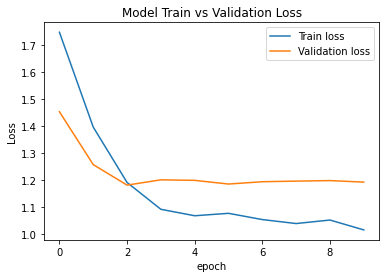

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.1258 - val_loss: 0.9887
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0975 - val_loss: 0.9771
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0833 - val_loss: 0.9768
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0639 - val_loss: 0.9777
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0704 - val_loss: 0.9783
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0854 - val_loss: 0.9786
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0602 - val_loss: 0.9796
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0565 - val_loss: 0.9801
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0464 - val_loss: 0.9812
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0208 - val_loss: 0.9813
171
6/6 [=========

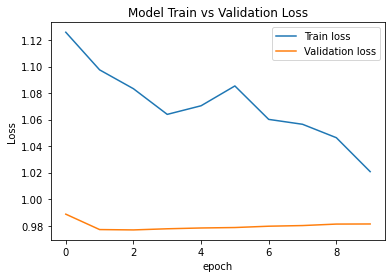

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.3175 - val_loss: 1.3438
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1291 - val_loss: 1.2688
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0599 - val_loss: 1.2534
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0356 - val_loss: 1.2568
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0785 - val_loss: 1.2593
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0444 - val_loss: 1.2602
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0679 - val_loss: 1.2584
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9995 - val_loss: 1.2583
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0421 - val_loss: 1.2598
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0031 - val_loss: 1.2571
171
6/6 [=========

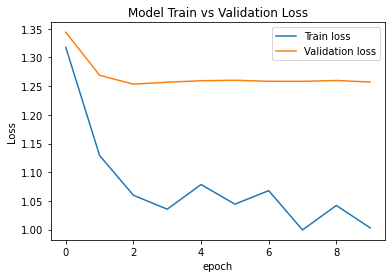

Epoch 1/10
22/22 [==============================] - 5s 30ms/step - loss: 1.1300 - val_loss: 1.1905
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0555 - val_loss: 1.1234
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0283 - val_loss: 1.0945
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0204 - val_loss: 1.0900
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0210 - val_loss: 1.0867
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0103 - val_loss: 1.0841
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9998 - val_loss: 1.0869
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0119 - val_loss: 1.0883
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0004 - val_loss: 1.0853
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 0.9891 - val_loss: 1.0833
171
6/6 [=========

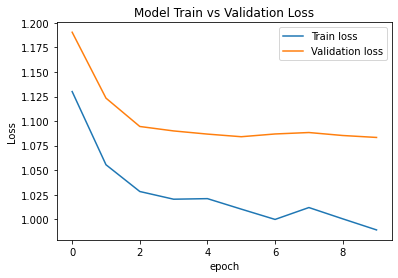

Epoch 1/10
22/22 [==============================] - 5s 37ms/step - loss: 1.0843 - val_loss: 1.2878
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0988 - val_loss: 1.2852
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0891 - val_loss: 1.2846
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0620 - val_loss: 1.2909
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0794 - val_loss: 1.2870
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0369 - val_loss: 1.2994
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0209 - val_loss: 1.2951
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0035 - val_loss: 1.2880
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0108 - val_loss: 1.2912
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0166 - val_loss: 1.3001
171
6/6 [=======

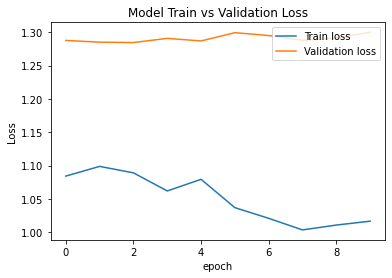

{'AAPL': 1.58071388100247, 'ABBV': 1.0129652445515904, 'ACN': 1.6718978655471708, 'AMD': 1.5095005552612606, 'AMZN': 1.888823448675864, 'AVGO': 1.396349148073809, 'BAC': 1.3520922976095544, 'BRK-B': 1.4409017306642686, 'COST': 1.6217281561052694, 'CSCO': 1.4623702060928476, 'CVX': 1.5581499927413476, 'DIS': 1.8715566287315784, 'GOOG': 1.7973024316872386, 'GOOGL': 1.8155992197745736, 'HD': 1.644728648056743, 'JNJ': 1.3493513990420491, 'JPM': 1.5667763162589416, 'KO': 1.3347960521955224, 'LLY': 1.4646519656579404, 'MA': 1.4152166980800103, 'MCD': 1.3648245171954867, 'META': 1.8621531671457519, 'MRK': 1.0685327427186293, 'MSFT': 1.6779720039736943, 'NVDA': 2.1543308085926234, 'PEP': 1.3246166383941542, 'PFE': 1.5472256223833014, 'PG': 1.2029133865999209, 'TMO': 1.5798396574248146, 'TSLA': 1.3938172264505813, 'UNH': 1.306517059619179, 'V': 1.5056885006737282, 'WMT': 1.355476990133855, 'XOM': 1.7264444333728044, '^IXIC': 2.0926914775381573, '^RUT': 1.7220308102051993}
{'AAPL': 1.25726444354

In [17]:
gru(df_sp500)

gru_sp500_mse_dict = mse_test_dict
gru_sp500_rmse_dict = rmse_test_dict
gru_sp500_mae_dict = mae_test_dict
print(gru_sp500_mse_dict)
print(gru_sp500_rmse_dict)
print(gru_sp500_mae_dict)

# GRU on Commodity DataFrame

Epoch 1/10
22/22 [==============================] - 6s 24ms/step - loss: 1.2721 - val_loss: 1.1201
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1535 - val_loss: 1.0065
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0703 - val_loss: 0.9556
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0382 - val_loss: 0.9464
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0248 - val_loss: 0.9487
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0195 - val_loss: 0.9483
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0397 - val_loss: 0.9507
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0229 - val_loss: 0.9496
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0053 - val_loss: 0.9504
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0116 - val_loss: 0.9502
175
6/6 [========

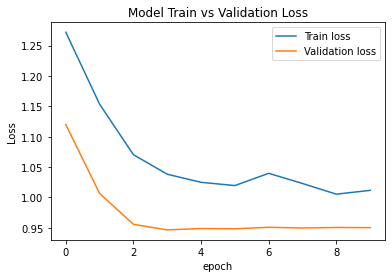

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 2.5338 - val_loss: 2.4978
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 2.0693 - val_loss: 2.1534
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.6736 - val_loss: 1.8522
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.2778 - val_loss: 1.6267
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9800 - val_loss: 1.7324
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9610 - val_loss: 1.6847
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9511 - val_loss: 1.6678
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9277 - val_loss: 1.6849
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9469 - val_loss: 1.6694
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9510 - val_loss: 1.6697
169
6/6 [=

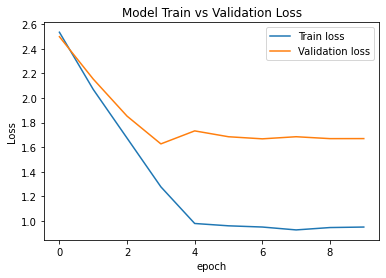

Epoch 1/10
22/22 [==============================] - 6s 29ms/step - loss: 1.1159 - val_loss: 0.9900
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1011 - val_loss: 0.9832
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0763 - val_loss: 0.9785
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0717 - val_loss: 0.9797
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0565 - val_loss: 0.9785
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0483 - val_loss: 0.9814
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0754 - val_loss: 0.9836
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0654 - val_loss: 0.9787
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0416 - val_loss: 0.9848
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0333 - val_loss: 0.9827
170
6/6 [======

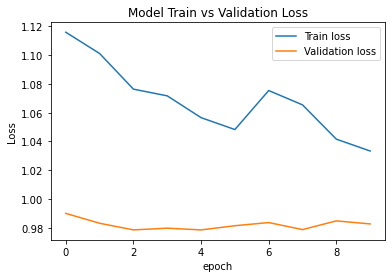

Epoch 1/10
21/21 [==============================] - 6s 43ms/step - loss: 1.1781 - val_loss: 0.4646
Epoch 2/10
21/21 [==============================] - 0s 9ms/step - loss: 1.1209 - val_loss: 0.4538
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 1.1238 - val_loss: 0.4521
Epoch 4/10
21/21 [==============================] - 0s 10ms/step - loss: 1.1179 - val_loss: 0.4499
Epoch 5/10
21/21 [==============================] - 0s 9ms/step - loss: 1.1220 - val_loss: 0.4492
Epoch 6/10
21/21 [==============================] - 0s 10ms/step - loss: 1.0984 - val_loss: 0.4463
Epoch 7/10
21/21 [==============================] - 0s 9ms/step - loss: 1.0900 - val_loss: 0.4443
Epoch 8/10
21/21 [==============================] - 0s 10ms/step - loss: 1.0478 - val_loss: 0.4430
Epoch 9/10
21/21 [==============================] - 0s 10ms/step - loss: 1.0658 - val_loss: 0.4458
Epoch 10/10
21/21 [==============================] - 0s 10ms/step - loss: 1.0677 - val_loss: 0.4451
163
6/6 [===

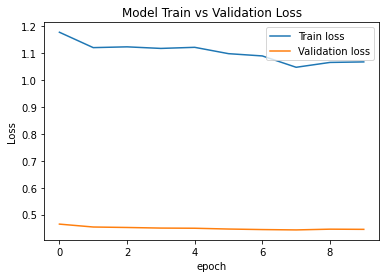

Epoch 1/10
23/23 [==============================] - 5s 52ms/step - loss: 1.2373 - val_loss: 1.4288
Epoch 2/10
23/23 [==============================] - 0s 10ms/step - loss: 1.1697 - val_loss: 1.4040
Epoch 3/10
23/23 [==============================] - 0s 9ms/step - loss: 1.1459 - val_loss: 1.4028
Epoch 4/10
23/23 [==============================] - 0s 9ms/step - loss: 1.1369 - val_loss: 1.4032
Epoch 5/10
23/23 [==============================] - 0s 10ms/step - loss: 1.1055 - val_loss: 1.4039
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0797 - val_loss: 1.4058
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 1.1096 - val_loss: 1.4045
Epoch 8/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0965 - val_loss: 1.4028
Epoch 9/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0749 - val_loss: 1.4032
Epoch 10/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0577 - val_loss: 1.4029
176
6/6 [=======

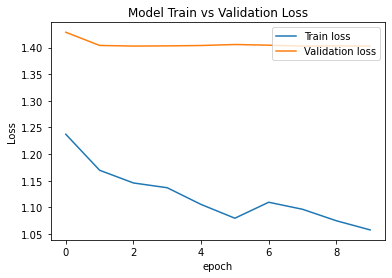

Epoch 1/10
23/23 [==============================] - 5s 30ms/step - loss: 1.2085 - val_loss: 1.2922
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 1.1077 - val_loss: 1.2954
Epoch 3/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0668 - val_loss: 1.3237
Epoch 4/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0514 - val_loss: 1.3207
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0223 - val_loss: 1.3104
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0173 - val_loss: 1.3334
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0339 - val_loss: 1.3284
Epoch 8/10
23/23 [==============================] - 0s 9ms/step - loss: 0.9981 - val_loss: 1.3189
Epoch 9/10
23/23 [==============================] - 0s 9ms/step - loss: 0.9905 - val_loss: 1.3043
Epoch 10/10
23/23 [==============================] - 0s 9ms/step - loss: 0.9665 - val_loss: 1.3047
179
6/6 [=========

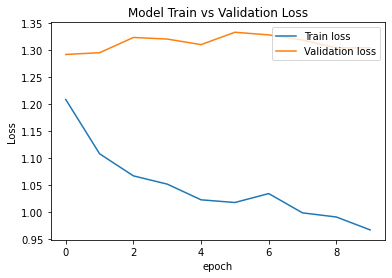

Epoch 1/10
22/22 [==============================] - 5s 38ms/step - loss: 1.4200 - val_loss: 1.0726
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2270 - val_loss: 0.9497
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2193 - val_loss: 0.9041
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1318 - val_loss: 0.8931
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1367 - val_loss: 0.8902
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1476 - val_loss: 0.8885
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0800 - val_loss: 0.8869
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1160 - val_loss: 0.8846
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0747 - val_loss: 0.8836
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0570 - val_loss: 0.8888
172
6/6 [=========

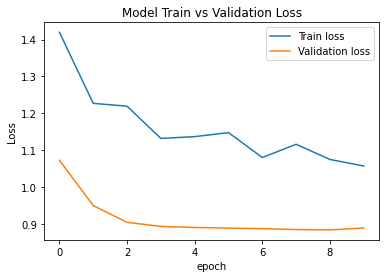

Epoch 1/10
27/27 [==============================] - 5s 26ms/step - loss: 1.1011 - val_loss: 1.4542
Epoch 2/10
27/27 [==============================] - 0s 8ms/step - loss: 1.0504 - val_loss: 1.4256
Epoch 3/10
27/27 [==============================] - 0s 9ms/step - loss: 1.0179 - val_loss: 1.4161
Epoch 4/10
27/27 [==============================] - 0s 9ms/step - loss: 1.0097 - val_loss: 1.4070
Epoch 5/10
27/27 [==============================] - 0s 8ms/step - loss: 0.9863 - val_loss: 1.3955
Epoch 6/10
27/27 [==============================] - 0s 9ms/step - loss: 0.9871 - val_loss: 1.3777
Epoch 7/10
27/27 [==============================] - 0s 8ms/step - loss: 0.9653 - val_loss: 1.3427
Epoch 8/10
27/27 [==============================] - 0s 9ms/step - loss: 0.9671 - val_loss: 1.3046
Epoch 9/10
27/27 [==============================] - 0s 9ms/step - loss: 0.9153 - val_loss: 1.2763
Epoch 10/10
27/27 [==============================] - 0s 9ms/step - loss: 0.9322 - val_loss: 1.2608
210
7/7 [=========

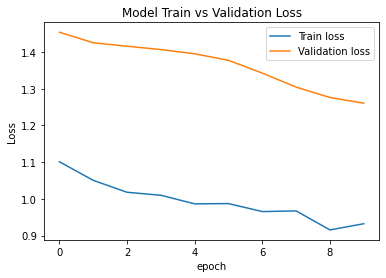

Epoch 1/10
22/22 [==============================] - 5s 32ms/step - loss: 1.0583 - val_loss: 0.9807
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0676 - val_loss: 0.9788
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0510 - val_loss: 0.9789
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0300 - val_loss: 0.9784
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0512 - val_loss: 0.9781
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0418 - val_loss: 0.9778
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0270 - val_loss: 0.9779
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0225 - val_loss: 0.9773
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0204 - val_loss: 0.9770
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0196 - val_loss: 0.9765
175
6/6 [=========

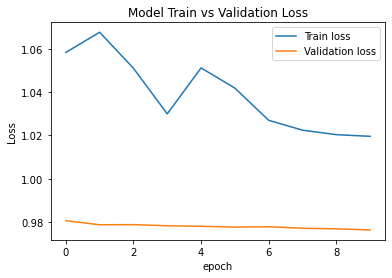

Epoch 1/10
23/23 [==============================] - 5s 33ms/step - loss: 2.7876 - val_loss: 2.0504
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 2.1892 - val_loss: 1.5966
Epoch 3/10
23/23 [==============================] - 0s 8ms/step - loss: 1.6850 - val_loss: 1.1852
Epoch 4/10
23/23 [==============================] - 0s 8ms/step - loss: 1.1873 - val_loss: 1.0027
Epoch 5/10
23/23 [==============================] - 0s 8ms/step - loss: 1.1237 - val_loss: 0.9960
Epoch 6/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0741 - val_loss: 0.9850
Epoch 7/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0744 - val_loss: 0.9851
Epoch 8/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0681 - val_loss: 0.9873
Epoch 9/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0716 - val_loss: 0.9875
Epoch 10/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0555 - val_loss: 0.9833
179
6/6 [=========

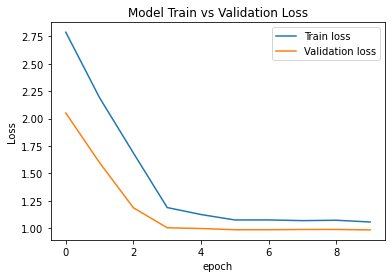

Epoch 1/10
22/22 [==============================] - 5s 27ms/step - loss: 1.8283 - val_loss: 1.3741
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.5464 - val_loss: 1.1080
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2684 - val_loss: 0.9427
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1047 - val_loss: 0.8754
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0969 - val_loss: 0.8718
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0943 - val_loss: 0.8720
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0577 - val_loss: 0.8728
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0643 - val_loss: 0.8732
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0633 - val_loss: 0.8741
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0606 - val_loss: 0.8750
171
6/6 [=========

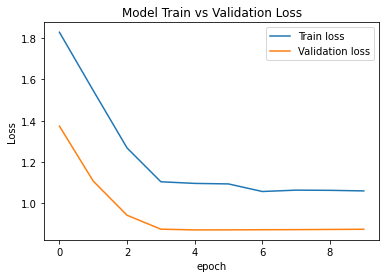

Epoch 1/10
22/22 [==============================] - 5s 31ms/step - loss: 2.1981 - val_loss: 1.8673
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.8414 - val_loss: 1.5575
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.5596 - val_loss: 1.2972
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.3000 - val_loss: 1.0298
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0542 - val_loss: 0.9037
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0137 - val_loss: 0.8992
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0175 - val_loss: 0.8988
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0145 - val_loss: 0.8986
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0152 - val_loss: 0.8985
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0136 - val_loss: 0.8986
172
6/6 [=========

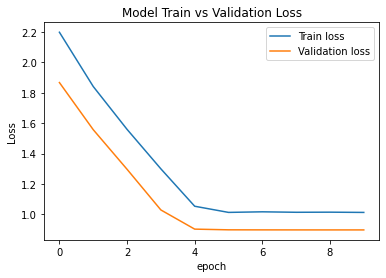

Epoch 1/10
22/22 [==============================] - 5s 57ms/step - loss: 1.4800 - val_loss: 0.9450
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.2314 - val_loss: 0.8156
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1685 - val_loss: 0.7655
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1029 - val_loss: 0.7514
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1292 - val_loss: 0.7493
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1062 - val_loss: 0.7486
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0772 - val_loss: 0.7464
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0703 - val_loss: 0.7430
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0519 - val_loss: 0.7438
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0457 - val_loss: 0.7448
172
6/6 [=========

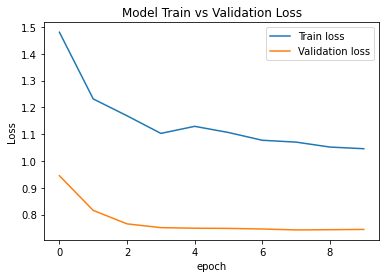

Epoch 1/10
22/22 [==============================] - 5s 38ms/step - loss: 2.3187 - val_loss: 2.3018
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.9107 - val_loss: 1.9043
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.5800 - val_loss: 1.5543
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.2768 - val_loss: 1.1802
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0327 - val_loss: 1.0219
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0041 - val_loss: 1.0338
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0259 - val_loss: 1.0334
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0116 - val_loss: 1.0275
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0057 - val_loss: 1.0321
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0130 - val_loss: 1.0312
175
6/6 [=====

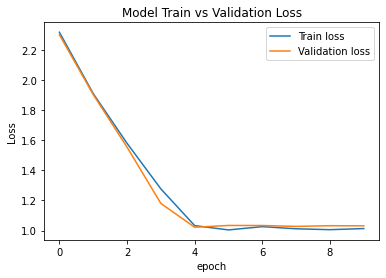

Epoch 1/10
22/22 [==============================] - 5s 29ms/step - loss: 1.1059 - val_loss: 1.7184
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0977 - val_loss: 1.7096
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0343 - val_loss: 1.7051
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0238 - val_loss: 1.6969
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0217 - val_loss: 1.6935
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0333 - val_loss: 1.6863
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0053 - val_loss: 1.6849
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0027 - val_loss: 1.6796
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9757 - val_loss: 1.6897
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9485 - val_loss: 1.6889
172
6/6 [===

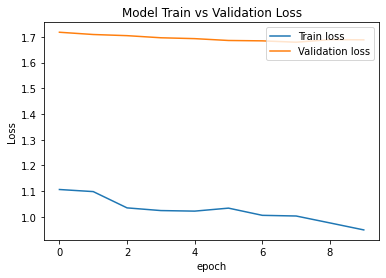

Epoch 1/10
23/23 [==============================] - 6s 33ms/step - loss: 1.2600 - val_loss: 1.3977
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 1.1173 - val_loss: 1.3999
Epoch 3/10
23/23 [==============================] - 0s 10ms/step - loss: 1.1417 - val_loss: 1.4098
Epoch 4/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0342 - val_loss: 1.4112
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0447 - val_loss: 1.4179
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0750 - val_loss: 1.3990
Epoch 7/10
23/23 [==============================] - 0s 10ms/step - loss: 1.0038 - val_loss: 1.4147
Epoch 8/10
23/23 [==============================] - 0s 9ms/step - loss: 0.9886 - val_loss: 1.4058
Epoch 9/10
23/23 [==============================] - 0s 9ms/step - loss: 0.9952 - val_loss: 1.4134
Epoch 10/10
23/23 [==============================] - 0s 10ms/step - loss: 0.9769 - val_loss: 1.4188
179
6/6 [======

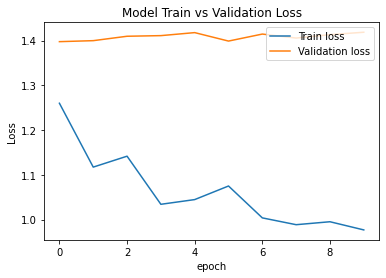

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.1354 - val_loss: 1.0790
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0790 - val_loss: 1.0830
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0845 - val_loss: 1.0840
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0982 - val_loss: 1.0828
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0836 - val_loss: 1.0846
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0651 - val_loss: 1.0795
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0331 - val_loss: 1.0845
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0393 - val_loss: 1.0856
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0199 - val_loss: 1.0836
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9977 - val_loss: 1.0871
171
6/6 [=====

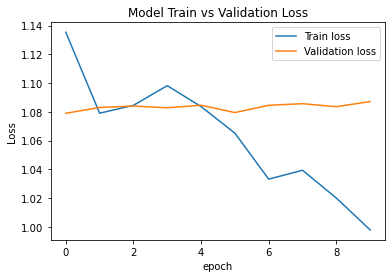

Epoch 1/10
22/22 [==============================] - 6s 37ms/step - loss: 1.9239 - val_loss: 2.1221
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.5151 - val_loss: 1.7345
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.2563 - val_loss: 1.4343
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0733 - val_loss: 1.2620
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0370 - val_loss: 1.2479
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0529 - val_loss: 1.2497
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0341 - val_loss: 1.2568
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0318 - val_loss: 1.2549
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0184 - val_loss: 1.2508
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0157 - val_loss: 1.2541
171
6/6 [===

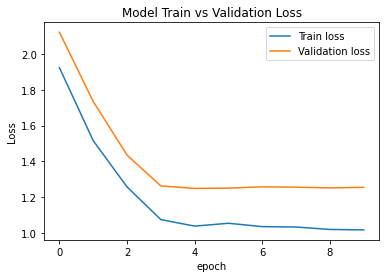

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.5901 - val_loss: 1.6452
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.2877 - val_loss: 1.3754
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1226 - val_loss: 1.2432
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0932 - val_loss: 1.2331
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0639 - val_loss: 1.2335
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0259 - val_loss: 1.2324
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0295 - val_loss: 1.2352
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0283 - val_loss: 1.2320
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0086 - val_loss: 1.2354
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0339 - val_loss: 1.2311
171
6/6 [==

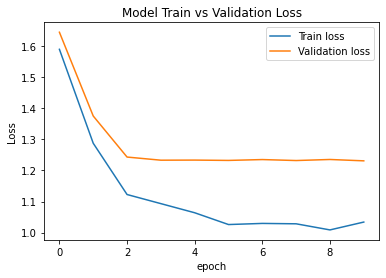

Epoch 1/10
26/26 [==============================] - 6s 31ms/step - loss: 1.0959 - val_loss: 1.3489
Epoch 2/10
26/26 [==============================] - 0s 10ms/step - loss: 1.0673 - val_loss: 1.3126
Epoch 3/10
26/26 [==============================] - 0s 10ms/step - loss: 1.0158 - val_loss: 1.3036
Epoch 4/10
26/26 [==============================] - 0s 10ms/step - loss: 1.0130 - val_loss: 1.3037
Epoch 5/10
26/26 [==============================] - 0s 11ms/step - loss: 0.9835 - val_loss: 1.3051
Epoch 6/10
26/26 [==============================] - 0s 10ms/step - loss: 0.9737 - val_loss: 1.3092
Epoch 7/10
26/26 [==============================] - 0s 11ms/step - loss: 0.9616 - val_loss: 1.3059
Epoch 8/10
26/26 [==============================] - 0s 10ms/step - loss: 0.9657 - val_loss: 1.3104
Epoch 9/10
26/26 [==============================] - 0s 10ms/step - loss: 0.9674 - val_loss: 1.3076
Epoch 10/10
26/26 [==============================] - 0s 9ms/step - loss: 0.9657 - val_loss: 1.3072
200
7/7 [=

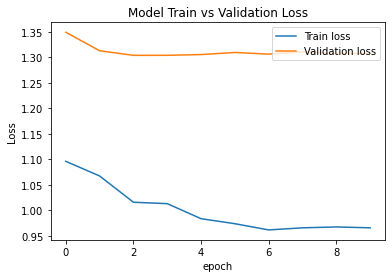

Epoch 1/10
27/27 [==============================] - 5s 28ms/step - loss: 1.4160 - val_loss: 1.6889
Epoch 2/10
27/27 [==============================] - 0s 8ms/step - loss: 1.1846 - val_loss: 1.4574
Epoch 3/10
27/27 [==============================] - 0s 9ms/step - loss: 1.0646 - val_loss: 1.3607
Epoch 4/10
27/27 [==============================] - 0s 10ms/step - loss: 1.0162 - val_loss: 1.3622
Epoch 5/10
27/27 [==============================] - 0s 9ms/step - loss: 1.0002 - val_loss: 1.3626
Epoch 6/10
27/27 [==============================] - 0s 10ms/step - loss: 0.9768 - val_loss: 1.3631
Epoch 7/10
27/27 [==============================] - 0s 10ms/step - loss: 0.9778 - val_loss: 1.3643
Epoch 8/10
27/27 [==============================] - 0s 10ms/step - loss: 0.9666 - val_loss: 1.3693
Epoch 9/10
27/27 [==============================] - 0s 10ms/step - loss: 0.9598 - val_loss: 1.3689
Epoch 10/10
27/27 [==============================] - 0s 9ms/step - loss: 0.9556 - val_loss: 1.3669
211
7/7 [====

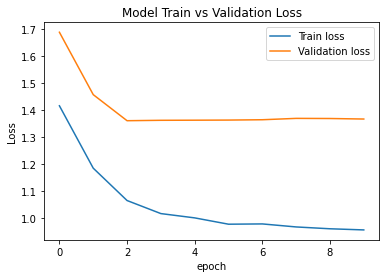

Epoch 1/10
22/22 [==============================] - 5s 55ms/step - loss: 1.2423 - val_loss: 0.7428
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1403 - val_loss: 0.7101
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0961 - val_loss: 0.7093
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1037 - val_loss: 0.7093
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0998 - val_loss: 0.7107
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0676 - val_loss: 0.7046
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0635 - val_loss: 0.7031
Epoch 8/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0694 - val_loss: 0.7052
Epoch 9/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0472 - val_loss: 0.7042
Epoch 10/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0275 - val_loss: 0.7023
171
6/6 [===

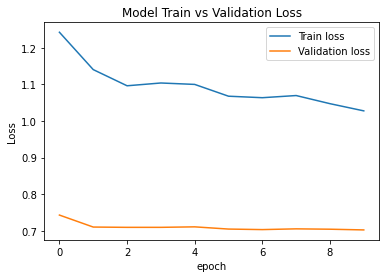

Epoch 1/10
22/22 [==============================] - 5s 39ms/step - loss: 1.0887 - val_loss: 0.7682
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0882 - val_loss: 0.7698
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0679 - val_loss: 0.7668
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0509 - val_loss: 0.7684
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0890 - val_loss: 0.7663
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0660 - val_loss: 0.7692
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0543 - val_loss: 0.7645
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0471 - val_loss: 0.7665
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0366 - val_loss: 0.7647
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0254 - val_loss: 0.7659
169
6/6 [=========

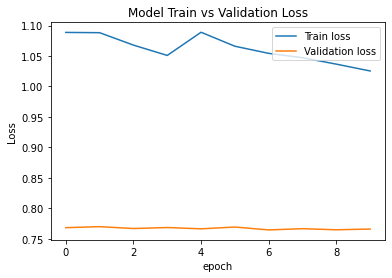

Epoch 1/10
23/23 [==============================] - 5s 39ms/step - loss: 1.4957 - val_loss: 1.2609
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 1.2884 - val_loss: 1.1610
Epoch 3/10
23/23 [==============================] - 0s 10ms/step - loss: 1.2071 - val_loss: 1.1602
Epoch 4/10
23/23 [==============================] - 0s 9ms/step - loss: 1.1615 - val_loss: 1.1626
Epoch 5/10
23/23 [==============================] - 0s 10ms/step - loss: 1.1147 - val_loss: 1.1688
Epoch 6/10
23/23 [==============================] - 0s 10ms/step - loss: 1.1180 - val_loss: 1.1637
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 1.0821 - val_loss: 1.1787
Epoch 8/10
23/23 [==============================] - 0s 8ms/step - loss: 1.0544 - val_loss: 1.1736
Epoch 9/10
23/23 [==============================] - 0s 10ms/step - loss: 1.0077 - val_loss: 1.1615
Epoch 10/10
23/23 [==============================] - 0s 9ms/step - loss: 0.9934 - val_loss: 1.1689
176
6/6 [=====

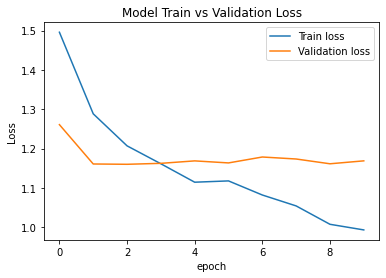

Epoch 1/10
22/22 [==============================] - 4s 32ms/step - loss: 2.2347 - val_loss: 2.6140
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.7473 - val_loss: 2.0313
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.3356 - val_loss: 1.5547
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1120 - val_loss: 1.3069
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1082 - val_loss: 1.3156
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0870 - val_loss: 1.3114
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0651 - val_loss: 1.3084
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0255 - val_loss: 1.3164
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0296 - val_loss: 1.3041
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0210 - val_loss: 1.3120
171
6/6 [====

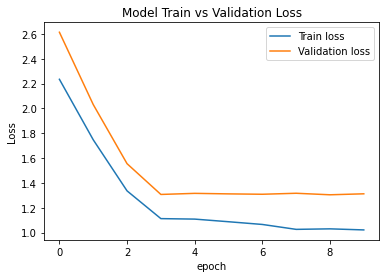

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.2074 - val_loss: 0.9597
Epoch 2/10
22/22 [==============================] - 0s 11ms/step - loss: 1.1043 - val_loss: 0.9333
Epoch 3/10
22/22 [==============================] - 0s 11ms/step - loss: 1.1040 - val_loss: 0.9304
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0889 - val_loss: 0.9325
Epoch 5/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0596 - val_loss: 0.9340
Epoch 6/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0906 - val_loss: 0.9348
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0849 - val_loss: 0.9334
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0660 - val_loss: 0.9317
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0590 - val_loss: 0.9282
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0438 - val_loss: 0.9270
171
6/6 [=

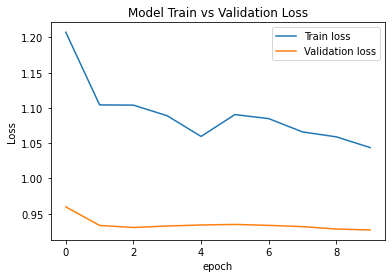

Epoch 1/10
22/22 [==============================] - 5s 38ms/step - loss: 1.1427 - val_loss: 1.2700
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0791 - val_loss: 1.2572
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0351 - val_loss: 1.2645
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0380 - val_loss: 1.2642
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0506 - val_loss: 1.2661
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0403 - val_loss: 1.2646
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0406 - val_loss: 1.2719
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0074 - val_loss: 1.2689
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0104 - val_loss: 1.2659
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0232 - val_loss: 1.2671
171
6/6 [=======

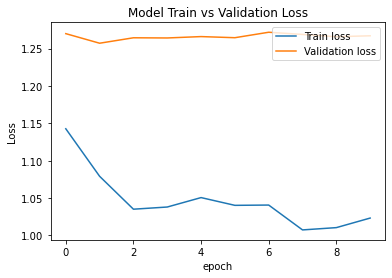

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.1043 - val_loss: 1.1726
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0538 - val_loss: 1.1613
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0463 - val_loss: 1.1597
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0452 - val_loss: 1.1612
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0359 - val_loss: 1.1603
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0550 - val_loss: 1.1603
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0097 - val_loss: 1.1593
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0216 - val_loss: 1.1597
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.9998 - val_loss: 1.1581
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0002 - val_loss: 1.1594
173
6/6 [=======

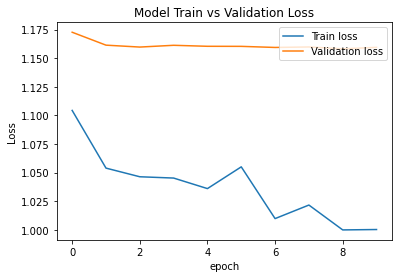

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 1.3218 - val_loss: 1.4120
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1566 - val_loss: 1.2235
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0729 - val_loss: 1.1442
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0700 - val_loss: 1.1332
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0576 - val_loss: 1.1356
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0598 - val_loss: 1.1367
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0478 - val_loss: 1.1359
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0394 - val_loss: 1.1373
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0366 - val_loss: 1.1369
Epoch 10/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0331 - val_loss: 1.1320
171
6/6 [====

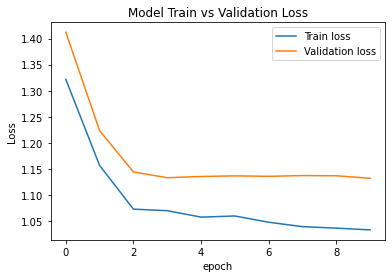

Epoch 1/10
22/22 [==============================] - 6s 36ms/step - loss: 1.0968 - val_loss: 1.2626
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0690 - val_loss: 1.2753
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0641 - val_loss: 1.2744
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0387 - val_loss: 1.2731
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0285 - val_loss: 1.2719
Epoch 6/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0459 - val_loss: 1.2686
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0342 - val_loss: 1.2682
Epoch 8/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0137 - val_loss: 1.2728
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 0.9895 - val_loss: 1.2714
Epoch 10/10
22/22 [==============================] - 0s 11ms/step - loss: 0.9999 - val_loss: 1.2639
174
6/6 [==

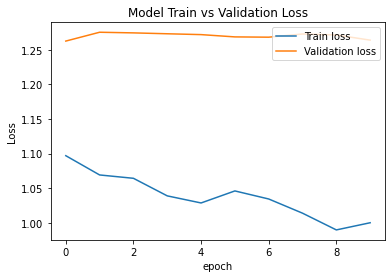

Epoch 1/10
22/22 [==============================] - 5s 35ms/step - loss: 1.1535 - val_loss: 0.9273
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.1464 - val_loss: 0.9175
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0793 - val_loss: 0.9176
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.1165 - val_loss: 0.9178
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0780 - val_loss: 0.9170
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0439 - val_loss: 0.9169
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0557 - val_loss: 0.9177
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0265 - val_loss: 0.9192
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0129 - val_loss: 0.9198
Epoch 10/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0073 - val_loss: 0.9203
171
6/6 [====

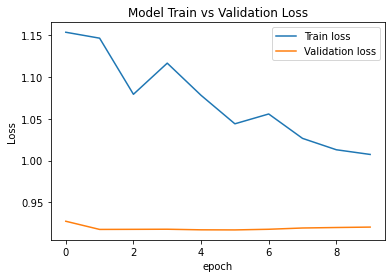

Epoch 1/10
22/22 [==============================] - 5s 51ms/step - loss: 1.1022 - val_loss: 1.1545
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0657 - val_loss: 1.1310
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0733 - val_loss: 1.1253
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0349 - val_loss: 1.1256
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0554 - val_loss: 1.1257
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0417 - val_loss: 1.1248
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0169 - val_loss: 1.1254
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0347 - val_loss: 1.1251
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0137 - val_loss: 1.1224
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 0.9951 - val_loss: 1.1216
174
6/6 [========

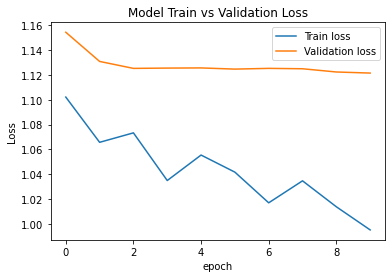

Epoch 1/10
22/22 [==============================] - 5s 34ms/step - loss: 1.1197 - val_loss: 0.9272
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0771 - val_loss: 0.9167
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0648 - val_loss: 0.9163
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0580 - val_loss: 0.9159
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0578 - val_loss: 0.9162
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 1.0465 - val_loss: 0.9154
Epoch 7/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0316 - val_loss: 0.9151
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.0304 - val_loss: 0.9149
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0116 - val_loss: 0.9181
Epoch 10/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0151 - val_loss: 0.9154
171
6/6 [======

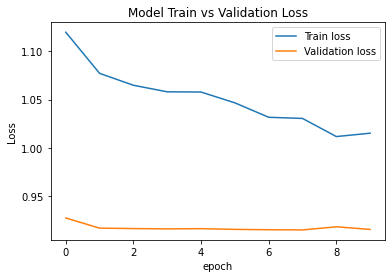

{'Brent Oil': 1.5444582919578609, 'Canola': 1.7169980433766623, 'Class III Milk': 1.122384752955026, 'Cobalt': 0.420039333257442, 'Copper': 1.3202600213343407, 'Crude Oil WTI': 1.9642871969182354, 'Feeder Cattle': 1.1672302096253244, 'Gasoline RBOB': 1.6183566098835107, 'Gold': 1.2463935613419639, 'Heating Oil': 1.743915096820424, 'Lead': 1.1872198395676559, 'Lean Hogs': 0.8787328084808987, 'Live Cattle': 0.7331915428503862, 'London Gas Oil': 1.8904977944789754, 'Lumber': 1.4162422054124937, 'Natural Gas': 1.5773119570241187, 'Nickel': 1.5793188996599177, 'Oats': 1.53976671451054, 'Orange Juice': 1.2654700063724853, 'Palladium': 1.6542286997627338, 'Platinum': 1.4378825181801127, 'Rough Rice': 1.0746079098581292, 'Rubber RSS3': 0.9051131881886082, 'Silver': 1.499100622173406, 'Tin': 1.7438785915020591, 'US Cocoa': 0.9449455125448142, 'US Coffee C': 1.2886728161503604, 'US Corn': 1.4014710761339817, 'US Cotton #2': 1.6052702765223104, 'US Soybeans': 1.5699920946862196, 'US Sugar #11': 0

In [18]:
gru(df_comm)

gru_comm_mse_dict = mse_test_dict
gru_comm_rmse_dict = rmse_test_dict
gru_comm_mae_dict = mae_test_dict
print(gru_comm_mse_dict)
print(gru_comm_rmse_dict)
print(gru_comm_mae_dict)

# Statistics

In [9]:
asset_list = [df_crypto, df_sp500, df_comm]

## First 4 Moments

### Mean (Moment #1)

#### Crypto Data

# Stored Variables

In [19]:
%store gru_crypto_mse_dict
%store gru_crypto_rmse_dict
%store gru_crypto_mae_dict

%store gru_sp500_mse_dict
%store gru_sp500_rmse_dict
%store gru_sp500_mae_dict

%store gru_comm_mse_dict
%store gru_comm_rmse_dict
%store gru_comm_mae_dict

Stored 'gru_crypto_mse_dict' (dict)
Stored 'gru_crypto_rmse_dict' (dict)
Stored 'gru_crypto_mae_dict' (dict)
Stored 'gru_sp500_mse_dict' (dict)
Stored 'gru_sp500_rmse_dict' (dict)
Stored 'gru_sp500_mae_dict' (dict)
Stored 'gru_comm_mse_dict' (dict)
Stored 'gru_comm_rmse_dict' (dict)
Stored 'gru_comm_mae_dict' (dict)
